

# *** Problem Statement***
  Conduct EDA on 2008-2022  seasonal data set ball-to-ball analysis by venue in the IPL to gain insights into team and player performance and assess the impact of playing conditions across different venues and seasons.

In [ ]:
# importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# Read the IPL dataset
ipl = pd.read_csv('/content/drive/MyDrive/eda 01/ipl_match_ball_by_ball_data.csv', parse_dates=['start_date'])

# Split the "start_date" column
ipl['day'] = ipl['start_date'].dt.day
ipl['month'] = ipl['start_date'].dt.month
ipl['year'] = ipl['start_date'].dt.year

# Display the modified datasetipl
ipl


<ipython-input-8-f4b3f009020e>:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ipl = pd.read_csv('/content/drive/MyDrive/eda 01/ipl_match_ball_by_ball_data.csv', parse_dates=['start_date'])


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,day,month,year
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,18,4,2008
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,2008
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,2008
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,2008
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022


from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***BUSINESS*** **UNDERSTAND**

**Analysis of top 5 rows**

In [ ]:
ipl.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,day,month,year
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,18,4,2008
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,2008
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,2008
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,2008
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,2008


**Analysis of Last 5 rows**

In [ ]:
ipl.tail(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,day,month,year
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022
225953,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,18.1,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022


**Column Information**

In [ ]:
ipl.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'day', 'month', 'year'],
      dtype='object')

**Checking Shape of Dataset**

In [ ]:
ipl.shape

(225954, 25)

In [ ]:
ipl.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,day,month,year
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,18,4,2008


In [ ]:
ipl["player_dismissed"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
225949    NaN
225950    NaN
225951    NaN
225952    NaN
225953    NaN
Name: player_dismissed, Length: 225954, dtype: object

**Checking Data information**

In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   match_id                225954 non-null  int64         
 1   season                  225954 non-null  object        
 2   start_date              225954 non-null  datetime64[ns]
 3   venue                   225954 non-null  object        
 4   innings                 225954 non-null  int64         
 5   ball                    225954 non-null  float64       
 6   batting_team            225954 non-null  object        
 7   bowling_team            225954 non-null  object        
 8   striker                 225954 non-null  object        
 9   non_striker             225954 non-null  object        
 10  bowler                  225954 non-null  object        
 11  runs_off_bat            225954 non-null  int64         
 12  extras                  225954

# **Statistics Analysis**

In [ ]:
ipl.describe(include="object").T

,count,unique,top,freq
season,225954,19,2013,18177
venue,225954,49,Eden Gardens,17988
batting_team,225954,18,Mumbai Indians,27826
bowling_team,225954,18,Mumbai Indians,27854
striker,225954,605,V Kohli,5266
non_striker,225954,595,S Dhawan,5526
bowler,225954,473,R Ashwin,4024
wicket_type,11151,10,caught,6837
player_dismissed,11151,573,RG Sharma,194


from the above data we can conclude that

**Statistical Information of Dataset**

In [ ]:
ipl.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,225954.0,832047.003257,337954.245970,335982.0,501262.0,829737.0,1178395.0,1312200.0
innings,225954.0,1.483868,0.503104,1.0,1.0,1.0,2.0,6.0
ball,225954.0,9.547583,5.683986,0.1,4.5,9.4,14.4,19.9
runs_off_bat,225954.0,1.243523,1.618166,0.0,0.0,1.0,1.0,6.0
extras,225954.0,0.066907,0.341470,0.0,0.0,0.0,0.0,7.0
wides,7026.0,1.206234,0.792866,1.0,1.0,1.0,1.0,5.0
noballs,918.0,1.038126,0.342652,1.0,1.0,1.0,1.0,5.0
byes,583.0,1.859348,1.307175,1.0,1.0,1.0,4.0,4.0
legbyes,3531.0,1.301614,0.843200,1.0,1.0,1.0,1.0,5.0
penalty,2.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


# **Data Cleaning**

In [ ]:
ipl['season'].value_counts()

2013       18177
2022       17912
2011       17013
2020/21    14559
2009/10    14498
2014       14300
2016       14096
2017       13862
2015       13652
2009       13606
2007/08    13489
2021       11434
2012       10837
2018        8903
2019        7997
2012        6930
2019        6315
2018        5383
2021        2991
Name: season, dtype: int64

In [ ]:
ipl['season']=ipl['season'].replace('2007/08','2008')


In [ ]:
ipl['season']=ipl['season'].replace('2009/10','2010')

In [ ]:
ipl['season']=ipl['season'].replace('2020/21','2020')

In [ ]:
#ipl['season'].value_counts()

In [ ]:
ipl['season'].value_counts()

2013    18177
2022    17912
2011    17013
2020    14559
2010    14498
2014    14300
2016    14096
2017    13862
2015    13652
2009    13606
2008    13489
2021    11434
2012    10837
2018     8903
2019     7997
2012     6930
2019     6315
2018     5383
2021     2991
Name: season, dtype: int64

**Checking Datatypes Of Dataset**

In [ ]:
ipl.dtypes

match_id                           int64
season                            object
start_date                datetime64[ns]
venue                             object
innings                            int64
ball                             float64
batting_team                      object
bowling_team                      object
striker                           object
non_striker                       object
bowler                            object
runs_off_bat                       int64
extras                             int64
wides                            float64
noballs                          float64
byes                             float64
legbyes                          float64
penalty                          float64
wicket_type                       object
player_dismissed                  object
other_wicket_type                float64
other_player_dismissed           float64
day                                int64
month                              int64
year            

In [ ]:
ipl["season"]=ipl["season"].astype(int)
ipl

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,day,month,year
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,18,4,2008
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,2008
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,2008
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,2008
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,4,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,5,2022


In [ ]:
ipl.dtypes

match_id                           int64
season                             int64
start_date                datetime64[ns]
venue                             object
innings                            int64
ball                             float64
batting_team                      object
bowling_team                      object
striker                           object
non_striker                       object
bowler                            object
runs_off_bat                       int64
extras                             int64
wides                            float64
noballs                          float64
byes                             float64
legbyes                          float64
penalty                          float64
wicket_type                       object
player_dismissed                  object
other_wicket_type                float64
other_player_dismissed           float64
day                                int64
month                              int64
year            

In [ ]:
ipl.nunique()

match_id                  950
season                     15
start_date                706
venue                      49
innings                     6
ball                      180
batting_team               18
bowling_team               18
striker                   605
non_striker               595
bowler                    473
runs_off_bat                7
extras                      7
wides                       5
noballs                     4
byes                        4
legbyes                     5
penalty                     1
wicket_type                10
player_dismissed          573
other_wicket_type           0
other_player_dismissed      0
day                        31
month                       7
year                       15
dtype: int64

In [ ]:
len(ipl[ipl.duplicated()])

1

In [ ]:
ipl=ipl.drop_duplicates()


In [ ]:
len(ipl[ipl.duplicated()])

0

In [ ]:
ipl.isnull()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,day,month,year
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
225950,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
225951,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
225952,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


**Checking Null Values of Dataset**

In [ ]:
ipl.isnull().sum()

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     218927
noballs                   225035
byes                      225370
legbyes                   222422
penalty                   225951
wicket_type               214802
player_dismissed          214802
other_wicket_type         225953
other_player_dismissed    225953
day                            0
month                          0
year                           0
dtype: int64

In [ ]:
ipl.isnull().sum()/ipl.shape[0]*100

match_id                    0.000000
season                      0.000000
start_date                  0.000000
venue                       0.000000
innings                     0.000000
ball                        0.000000
batting_team                0.000000
bowling_team                0.000000
striker                     0.000000
non_striker                 0.000000
bowler                      0.000000
runs_off_bat                0.000000
extras                      0.000000
wides                      96.890504
noballs                    99.593721
byes                       99.741982
legbyes                    98.437286
penalty                    99.999115
wicket_type                95.064903
player_dismissed           95.064903
other_wicket_type         100.000000
other_player_dismissed    100.000000
day                         0.000000
month                       0.000000
year                        0.000000
dtype: float64

In [ ]:
ipl.dropna(axis="rows",how="all",inplace=True)



<ipython-input-35-363865959db9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl.dropna(axis="rows",how="all",inplace=True)


In [ ]:
# Display the current column names in the DataFrame
print(ipl.columns)

# Specify the columns to be dropped
#columns_to_drop = ['wicket_type', 'penalty', 'legbyes']

# Drop the specified columns
ipl.drop(columns=['wicket_type', 'penalty', 'legbyes'], axis=1, inplace=True)

# Display the DataFrame after dropping the columns
print(ipl.columns)


Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'day', 'month', 'year'],
      dtype='object')
Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'player_dismissed', 'other_wicket_type', 'other_player_dismissed',
       'day', 'month', 'year'],
      dtype='object')


<ipython-input-36-ecfd93d4f1e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl.drop(columns=['wicket_type', 'penalty', 'legbyes'], axis=1, inplace=True)


In [ ]:
ipl.isnull().sum()/ipl.shape[0]*100

match_id                    0.000000
season                      0.000000
start_date                  0.000000
venue                       0.000000
innings                     0.000000
ball                        0.000000
batting_team                0.000000
bowling_team                0.000000
striker                     0.000000
non_striker                 0.000000
bowler                      0.000000
runs_off_bat                0.000000
extras                      0.000000
wides                      96.890504
noballs                    99.593721
byes                       99.741982
player_dismissed           95.064903
other_wicket_type         100.000000
other_player_dismissed    100.000000
day                         0.000000
month                       0.000000
year                        0.000000
dtype: float64

In [ ]:
# Display the current column names in the DataFrame
print(ipl.columns)

# Drop the specified columns
ipl.drop(columns= ['wides', 'noballs', 'byes','other_wicket_type','player_dismissed','other_player_dismissed'], axis=1, inplace=True)

# Display the DataFrame after dropping the columns
print(ipl.columns)

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'player_dismissed', 'other_wicket_type', 'other_player_dismissed',
       'day', 'month', 'year'],
      dtype='object')
Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'day', 'month', 'year'],
      dtype='object')


<ipython-input-38-3fe90e457953>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl.drop(columns= ['wides', 'noballs', 'byes','other_wicket_type','player_dismissed','other_player_dismissed'], axis=1, inplace=True)


In [ ]:
ipl.isnull().sum()/ipl.shape[0]*100

match_id        0.0
season          0.0
start_date      0.0
venue           0.0
innings         0.0
ball            0.0
batting_team    0.0
bowling_team    0.0
striker         0.0
non_striker     0.0
bowler          0.0
runs_off_bat    0.0
extras          0.0
day             0.0
month           0.0
year            0.0
dtype: float64

In [ ]:
ipl.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,day,month,year
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,18,4,2008


In [ ]:
ipl.dtypes

match_id                 int64
season                   int64
start_date      datetime64[ns]
venue                   object
innings                  int64
ball                   float64
batting_team            object
bowling_team            object
striker                 object
non_striker             object
bowler                  object
runs_off_bat             int64
extras                   int64
day                      int64
month                    int64
year                     int64
dtype: object

# ***EDA***

**Checking Value Counts of all Columns**

In [ ]:
match_id_counts = ipl['match_id'].value_counts()

match_id_counts

1216517    269
392190     267
1082625    263
729315     262
829737     262
          ... 
392183     108
829807     106
598068     100
501265      63
1178424     51
Name: match_id, Length: 950, dtype: int64

In [ ]:
season_counts = ipl['season'].value_counts()
season_counts

2013    18177
2022    17912
2012    17767
2011    17013
2020    14559
2010    14497
2021    14425
2019    14312
2014    14300
2018    14286
2016    14096
2017    13862
2015    13652
2009    13606
2008    13489
Name: season, dtype: int64

In [ ]:
ipl['season'].describe()

count    225953.000000
mean       2015.027014
std           4.321753
min        2008.000000
25%        2011.000000
50%        2015.000000
75%        2019.000000
max        2022.000000
Name: season, dtype: float64

In [ ]:
season_counts = ipl['season'].value_counts().reset_index().rename(columns={"index":"year","season":"count"})
season_counts


,year,count
0,2013,18177
1,2022,17912
2,2012,17767
3,2011,17013
4,2020,14559
5,2010,14497
6,2021,14425
7,2019,14312
8,2014,14300
9,2018,14286


In [ ]:


ipl


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,day,month,year
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,18,4,2008
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,18,4,2008
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,18,4,2008
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,18,4,2008
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,18,4,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,R Ashwin,1,0,29,5,2022
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,R Ashwin,0,0,29,5,2022
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,R Ashwin,1,0,29,5,2022
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,R Ashwin,2,0,29,5,2022


In [ ]:
start_date_counts = ipl['start_date'].value_counts().reset_index()
(start_date_counts)

,index,start_date
0,2020-10-18,520
1,2009-04-23,513
2,2021-04-25,510
3,2017-04-29,508
4,2013-04-16,506
...,...,...
701,2008-05-16,136
702,2015-04-29,128
703,2015-05-13,126
704,2015-05-15,106


In [ ]:
venue_counts = ipl['venue'].value_counts()
venue_counts



Eden Gardens                                            17988
Wankhede Stadium                                        17591
M Chinnaswamy Stadium                                   14907
Feroz Shah Kotla                                        13950
MA Chidambaram Stadium, Chepauk                         11760
Rajiv Gandhi International Stadium, Uppal               11604
Dubai International Cricket Stadium                     11229
Sawai Mansingh Stadium                                  11150
Punjab Cricket Association Stadium, Mohali               8266
Wankhede Stadium, Mumbai                                 7530
Sheikh Zayed Stadium                                     6925
Sharjah Cricket Stadium                                  6672
Maharashtra Cricket Association Stadium                  5294
Dr DY Patil Sports Academy, Mumbai                       4905
Brabourne Stadium, Mumbai                                4057
Dr DY Patil Sports Academy                               3993
Subrata 

highest balls

In [ ]:
venue_counts = len(venue_counts)
venue_counts

49

In [ ]:
print(ipl.value_counts(subset=['venue','start_date']).reset_index())


                                         venue start_date    0
0                                    Kingsmead 2009-04-29  502
1                                    Kingsmead 2009-05-05  492
2                                    Kingsmead 2009-05-14  491
3                         Sheikh Zayed Stadium 2014-04-18  490
4                              SuperSport Park 2009-05-21  488
..                                         ...        ...  ...
929                           Feroz Shah Kotla 2008-05-17  123
930  Rajiv Gandhi International Stadium, Uppal 2015-05-15  106
931                      M Chinnaswamy Stadium 2013-05-18  100
932                           Feroz Shah Kotla 2011-05-21   63
933                      M.Chinnaswamy Stadium 2019-04-30   51

[934 rows x 3 columns]


In [ ]:
innings_counts = ipl['innings'].value_counts()
(innings_counts)

1    116882
2    108910
3        77
4        72
5         8
6         4
Name: innings, dtype: int64

In [ ]:
## balls count for all match and innings
ball_counts =ipl["ball"].value_counts().reset_index()
ball_counts


,index,ball
0,0.1,1928
1,0.3,1928
2,0.2,1928
3,0.4,1924
4,0.5,1918
...,...,...
175,15.9,5
176,12.9,5
177,10.9,4
178,7.9,4


In [ ]:
batting_team_counts= ipl['batting_team'].value_counts()
batting_team_counts

Mumbai Indians                 27825
Royal Challengers Bangalore    26512
Kolkata Knight Riders          26192
Chennai Super Kings            25128
Rajasthan Royals               22777
Kings XI Punjab                22646
Delhi Daredevils               18786
Sunrisers Hyderabad            18196
Deccan Chargers                 9034
Delhi Capitals                  7587
Pune Warriors                   5443
Gujarat Lions                   3566
Punjab Kings                    3388
Gujarat Titans                  1971
Rising Pune Supergiant          1900
Lucknow Super Giants            1840
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

In [ ]:
bowling_team = ipl['bowling_team'].value_counts()
bowling_team

Mumbai Indians                 27854
Royal Challengers Bangalore    26712
Kolkata Knight Riders          26355
Chennai Super Kings            24851
Rajasthan Royals               22865
Kings XI Punjab                22483
Delhi Daredevils               18724
Sunrisers Hyderabad            18139
Deccan Chargers                 9039
Delhi Capitals                  7730
Pune Warriors                   5457
Gujarat Lions                   3545
Punjab Kings                    3292
Rising Pune Supergiant          1928
Gujarat Titans                  1907
Lucknow Super Giants            1843
Rising Pune Supergiants         1615
Kochi Tuskers Kerala            1614
Name: bowling_team, dtype: int64

In [ ]:
striker_counts = ipl['striker'].value_counts()
striker_counts
striker_counts.head(10)

V Kohli           5266
S Dhawan          5083
RG Sharma         4632
DA Warner         4313
SK Raina          4177
RV Uthappa        3927
MS Dhoni          3802
G Gambhir         3524
CH Gayle          3516
AB de Villiers    3487
Name: striker, dtype: int64

In [ ]:
non_striker_counts = ipl['non_striker'].value_counts()
non_striker_counts
non_striker_counts.head(25)

S Dhawan          5526
V Kohli           5150
RG Sharma         4629
SK Raina          4309
DA Warner         4108
RV Uthappa        3779
G Gambhir         3740
AM Rahane         3739
MS Dhoni          3462
KD Karthik        3424
AB de Villiers    3423
AT Rayudu         3423
CH Gayle          3322
MK Pandey         3200
F du Plessis      3011
KL Rahul          2964
SR Watson         2739
SV Samson         2676
PA Patel          2608
SS Iyer           2429
SR Tendulkar      2427
BB McCullum       2356
JH Kallis         2333
M Vijay           2297
KA Pollard        2224
Name: non_striker, dtype: int64

In [ ]:
bowler_counts = ipl['bowler'].value_counts().reset_index()
bowler_counts


,index,bowler
0,R Ashwin,4024
1,SP Narine,3516
2,Harbhajan Singh,3496
3,B Kumar,3384
4,A Mishra,3317
...,...,...
468,SN Khan,2
469,SPD Smith,2
470,DA Warner,2
471,AC Gilchrist,1


In [ ]:
runs_off_bat_counts = ipl['runs_off_bat'].value_counts()
runs_off_bat_counts



0    90778
1    83927
4    25500
2    14313
6    10666
3      708
5       61
Name: runs_off_bat, dtype: int64

In [ ]:
extras_counts = ipl['extras'].value_counts()
extras_counts
extras_counts.head(10)

0    213904
1     10760
2       499
4       436
5       275
3        78
7         1
Name: extras, dtype: int64

In [ ]:
day_counts = ipl['day'].value_counts()
day_counts

19    9231
22    8448
10    8425
14    8410
21    8407
20    8282
17    8281
13    8153
25    8083
8     7928
7     7926
18    7911
24    7905
27    7728
12    7696
16    7666
15    7564
11    7434
1     7257
9     7191
28    7036
23    6899
29    6763
5     6662
30    6322
3     6281
6     6274
2     6142
4     5955
26    5834
31    1859
Name: day, dtype: int64

In [ ]:
month_counts = ipl['month'].value_counts()
month_counts

4     101789
5      90028
10     13477
3      11704
9       6532
11      1928
6        495
Name: month, dtype: int64

In [ ]:
year_counts = ipl['year'].value_counts()
year_counts

2013    18177
2022    17912
2012    17767
2011    17013
2020    14559
2010    14497
2021    14425
2019    14312
2014    14300
2018    14286
2016    14096
2017    13862
2015    13652
2009    13606
2008    13489
Name: year, dtype: int64

# **Univariate Analysis**

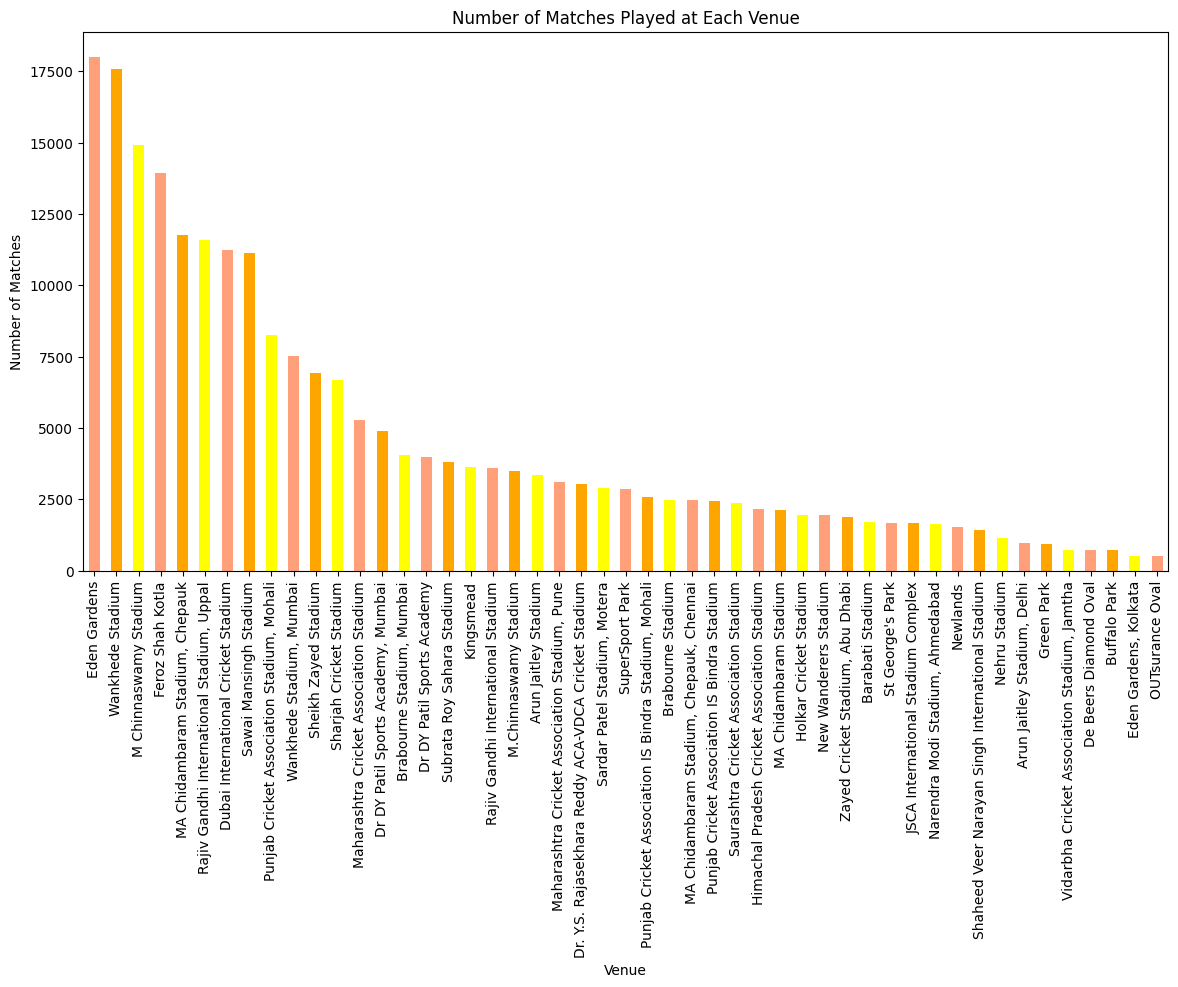

In [ ]:
venue_counts = ipl['venue'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(14, 7))  # Set the figure size
venue_counts.plot(kind='bar',color=["#FFA07A","#FFA500",'yellow'])

plt.title('Number of Matches Played at Each Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)





  # Rotate x-axis labels for better visibility
plt.show()

## **

Historic and Iconic Venue: Eden Gardens, established in 1864 at Kolkata, India, holds a significant place in cricket history, making it a prime choice for hosting high-profile Indian Premier League (IPL) matches. Its rich heritage and iconic status have attracted cricket fans from all over the country, contributing to its popularity as a favored venue for IPL games.

Home Ground of Kolkata Knight Riders: Eden Gardens serves as the home ground for the Kolkata Knight Riders (KKR), one of the most successful IPL franchises. As a result, a substantial number of IPL matches have been played at this venue due to the team's consistent participation and fan following, further solidifying its prominence in the IPL landscape.

Sourav Ganguly's Legacy: The legendary cricketer Sourav Ganguly, often referred to as the "Bengal Tiger," played his entire cricket career at Eden Gardens. This fact has added sentimental value to the venue, making it a special place for cricket enthusiasts, both regionally and nationally. As Ganguly's cricketing home, Eden Gardens has become a sentimental choice for hosting numerous high-profile IPL clashes.

Vast Seating Capacity and Infrastructure: With a seating capacity of around 68,000, Eden Gardens can accommodate a large number of spectators, providing an electric and vibrant atmosphere during IPL matches. The presence of floodlights enhances the stadium's suitability for hosting day-night fixtures, increasing the opportunities to stage more high-profile encounters. Its well-maintained facilities and infrastructure have also contributed to the consistent hosting of significant IPL matches at this venue.



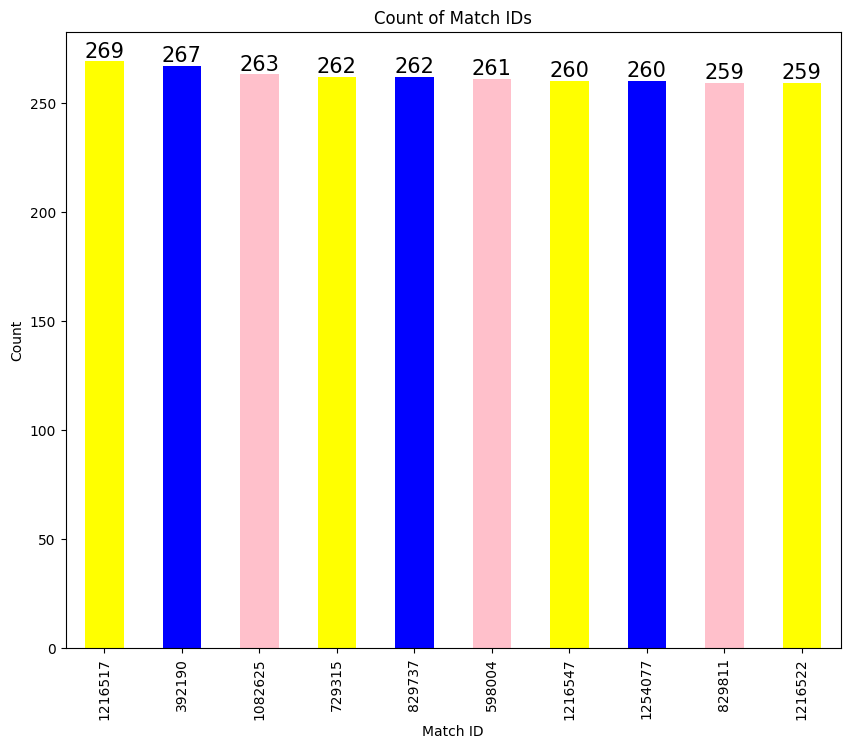

In [ ]:
plt.figure(figsize=(10,8))

ax = ipl["match_id"].value_counts()[:10].plot(kind="bar",color=["yellow","blue","pink"])

for i in ax.containers:
  ax.bar_label(i,label_type="edge",fontsize=15)

ax.set_xlabel("Match ID")
ax.set_ylabel("Count")
plt.title("Count of Match IDs")
plt.show()

## To analyze the number of balls played in matches between Chennai Super Kings (CSK) and Punjab Kings (formerly Kings XI Punjab), we can examine the dataset and calculate relevant statistics. Here's an example explanation:

* The analysis focuses on the number of balls played in matches between CSK and Punjab Kings in the Indian Premier League (IPL). By analyzing the data, we can gain insights into the overall intensity and duration of these matches.

* Additionally, we can examine the distribution of the number of balls played in these matches. This analysis reveals whether the number of balls played tends to cluster around specific values or if there is a wide range of values. Such insights can shed light on the style of play and strategies employed by both teams in their encounters.

* Overall, studying the number of balls played in CSK vs. Punjab Kings matches allows us to assess the intensity, duration, and competitiveness of these games. It provides valuable insights into the dynamics between the two teams and helps cricket enthusiasts understand the nature of their contests in the IPL.

#**Summary**
The Super Over has become a symbol of intense drama and high-stakes cricket in the IPL, elevating the level of excitement and delivering heart-stopping moments that epitomize the spirit of the game.

From the early years of the IPL to the present era, Super Overs have provided moments of unparalleled excitement and intense drama, ensuring that each match has the potential to deliver unexpected twists and turns until the very last ball is bowled.








<ipython-input-65-bd44111e233a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl['start_date'] = pd.to_datetime(ipl['start_date'])
<ipython-input-65-bd44111e233a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl['year'] = ipl['start_date'].dt.year


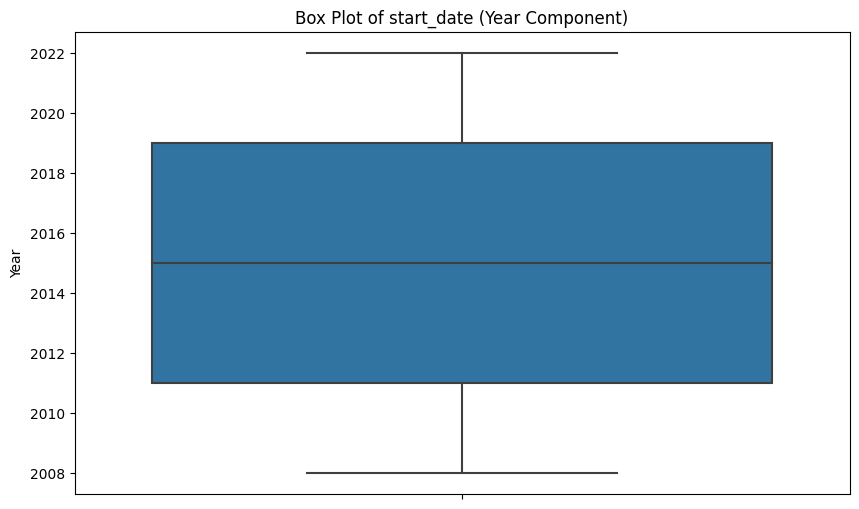

In [ ]:
# Convert the "start_date" column to datetime format
ipl['start_date'] = pd.to_datetime(ipl['start_date'])

# Extract year from the "start_date" column
ipl['year'] = ipl['start_date'].dt.year

# Plotting the box plot for the year component of start_date
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=ipl, y='year')
plt.title('Box Plot of start_date (Year Component)')
plt.ylabel('Year')
plt.show()

<Figure size 1400x700 with 0 Axes>

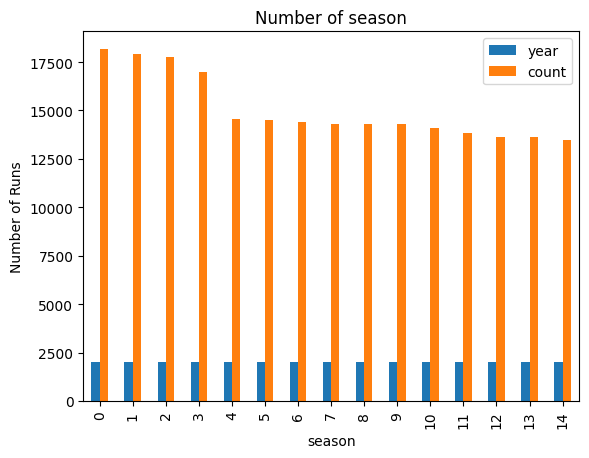

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(14, 7))  # Set the figure size
season_counts.plot(kind='bar')
plt.title('Number of season')
plt.xlabel('season')
plt.ylabel('Number of Runs')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

in the various seasons highest score is 17800

*   List item
*   List item



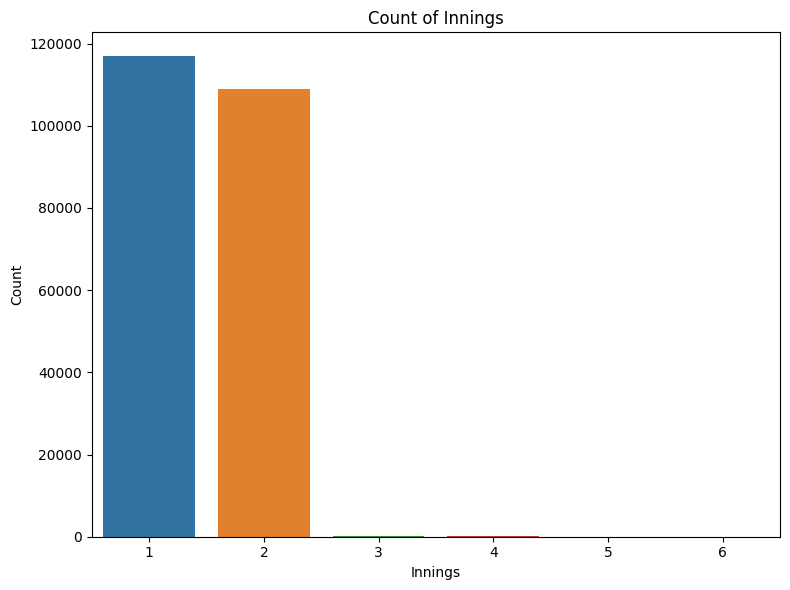

In [ ]:
# Plotting the count plot for innings
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=ipl, x='innings')
plt.title('Count of Innings')
plt.xlabel('Innings')
plt.ylabel('Count')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# In the Indian Premier League (IPL), an "inning" refers to the batting period of a team during a match. Each team has the opportunity to bat in two innings in a typical IPL match, unless a match is shortened or affected by external factors.

* First and Second Innings: In a standard IPL match, one team bats first, setting a target for the opposing team, while the other team bats second, attempting to chase down the target. The team that bats first is said to be playing the "first innings," and the team that bats second is playing the "second innings."

* Duration and Overs: Each innings in the IPL is typically limited to a specific number of overs. In most matches, each team gets to play 20 overs in their innings, with each over consisting of six deliveries. However, in certain cases, such as rain-affected matches or matches with revised playing conditions, the number of overs can be reduced.

* Strategic Approach: The team batting first aims to set a challenging total, while the team batting second tries to chase down the target within the allotted overs. The batting team's approach can vary depending on factors like pitch conditions, target set by the opposition, required run rate, and the match situation.

* Decision Making: The decision of whether to bat first or second is typically made by the team winning the toss before the match. Factors like pitch conditions, weather, and team strategies influence this decision. The team winning the toss can choose to either bat first or field first, giving them the advantage of setting a target or knowing the required run rate.

* Powerplay and Death Overs: Within each innings, there are specific phases known as the powerplay and death overs. During the powerplay, only a limited number of fielders are allowed outside the inner circle, providing an opportunity for batsmen to score boundaries. The death overs refer to the final few overs of an innings when batsmen often look to accelerate the scoring rate.

* Match Outcome: The cumulative runs scored by a team in their innings determine the match outcome. If the team batting second successfully chases down the target within the allotted overs, they win the match. However, if the team batting second fails to reach the target, the team batting first wins the match.

* Innings in the IPL play a crucial role in determining the outcome of matches. The teams' batting performances, run rates, partnerships, and strategic decisions during each innings contribute to the excitement and competitiveness of the tournament.








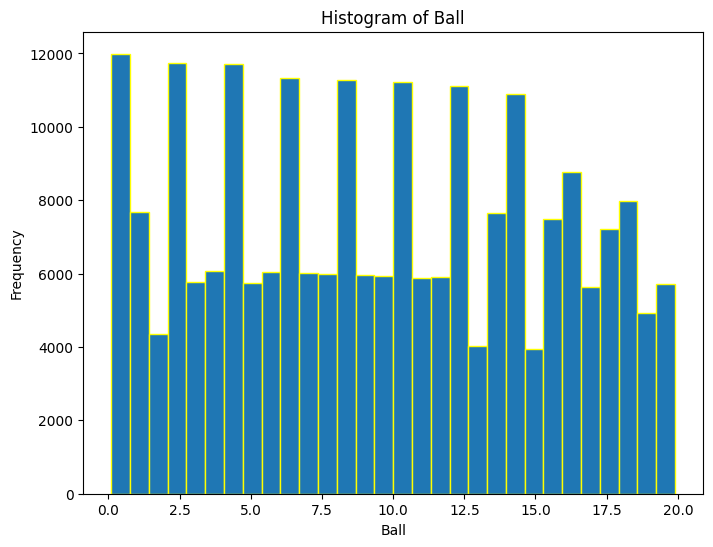

In [ ]:
# Plotting the histogram for ball
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(ipl['ball'], bins=30, edgecolor='yellow')
plt.title('Histogram of Ball')
plt.xlabel('Ball')
plt.ylabel('Frequency')
plt.show()

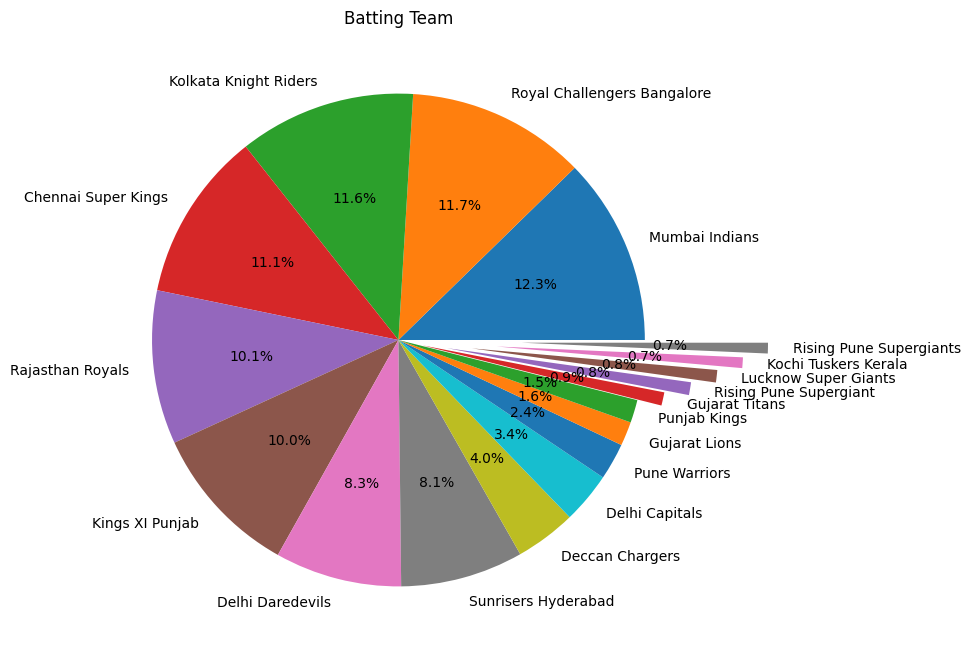

In [ ]:
# Calculate the frequency of each batting team
team_counts = ipl['batting_team'].value_counts()[:20]

# Plotting the pie plot for batting team
plt.figure(figsize=(10 ,8))  # Set the figure size
plt.pie(team_counts, labels=team_counts.index, autopct='%1.1f%%', explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.2,0.3,0.4,0.5))

plt.title('Batting Team')
plt.show()

# During the period from 2008 to 2022 in the Indian Premier League (IPL), several teams have participated in multiple seasons. Here are the teams that have played the most matches:

* Mumbai Indians (MI): Mumbai Indians is one of the most successful teams in IPL history. They have consistently participated in every season since 2008 and have played the most matches across all seasons.

* Royal Challengers Bangalore (RCB): Royal Challengers Bangalore has also been a consistent participant in the IPL since its inception. They have played a significant number of matches over the years.

* Kolkata Knight Riders (KKR): Kolkata Knight Riders is another team that has been a part of the IPL since the beginning. They have played a substantial number of matches and have had success in the tournament.

* Chennai Super Kings (CSK): Chennai Super Kings has been one of the most dominant teams in the IPL. Though they were suspended for two seasons, they have played a considerable number of matches and have a strong track record.

* Kings XI Punjab / Punjab Kings (KXIP / PBKS): Kings XI Punjab, now known as Punjab Kings, has participated in multiple seasons of the IPL. They have played a significant number of matches during this period.

* Rajasthan Royals (RR): Rajasthan Royals was the winner of the inaugural IPL season in 2008. They have played a good number of matches in subsequent seasons as well.

These teams have consistently been part of the IPL and have played a substantial number of matches throughout the years. Their participation and performance have made them prominent and popular among IPL fans.








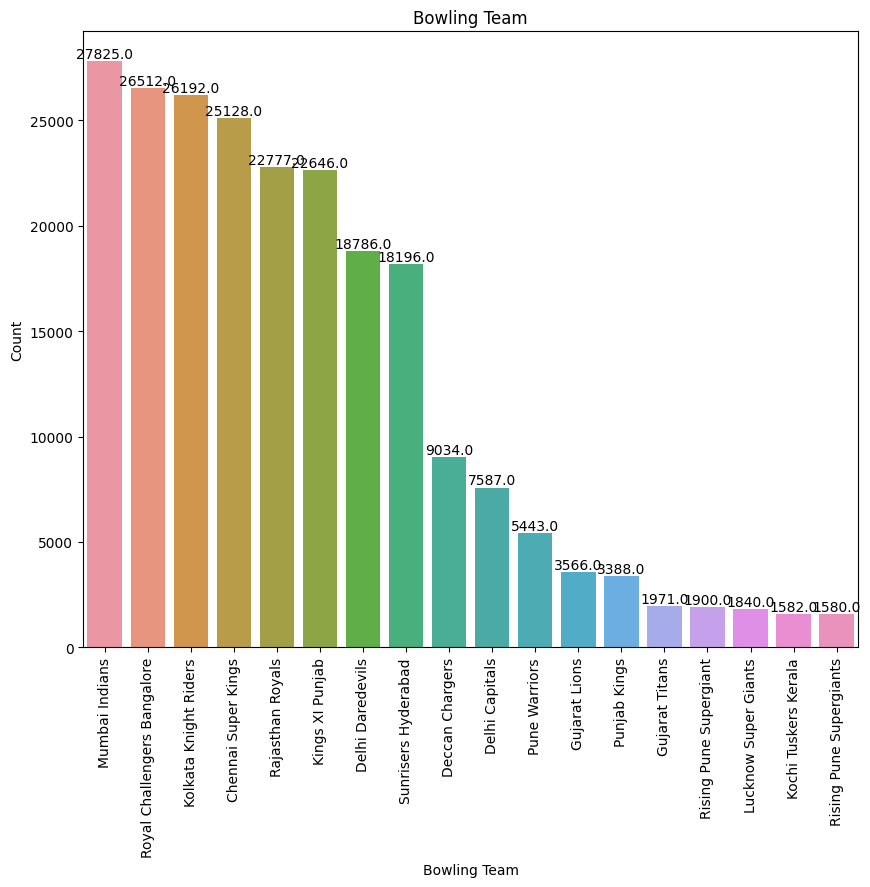

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 8))

# Plotting the bar plot for bowling team
ax = sns.barplot(x=team_counts.index, y=team_counts)
plt.title('Bowling Team')
plt.xlabel('Bowling Team')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Annotate bar heights
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

#The team that has bowled the most balls in the Indian Premier League (IPL) matches can vary from season to season. However, based on historical data, some teams have consistently been known for their strong bowling attacks and have bowled a significant number of balls over the years.

* Teams like Mumbai Indians (MI)27826 balls, Chennai Super Kings (CSK)25182 balls, Kolkata Knight Riders (KKR)26192 balls, and Royal Challengers Bangalore (RCB)26512 balls have often had well-balanced bowling lineups and have bowled a high number of balls in IPL matches.

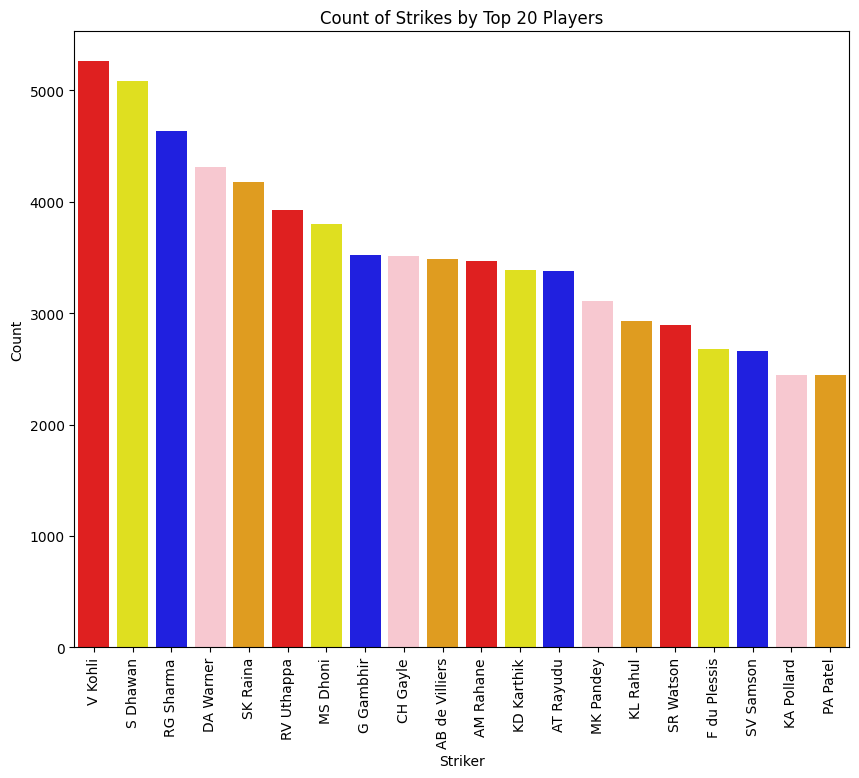

In [ ]:
# Calculate the frequency of each striker
striker_counts = ipl['striker'].value_counts()[:20]

# Set up the plot
plt.figure(figsize=(10, 8))

# Specify the color palette
color_palette = ['RED', 'YELLOW', 'BLUE', 'PINK', 'ORANGE']

# Plotting the count plot for top 20 strikers with a custom color palette
sns.countplot(data=ipl, x='striker', order=striker_counts.index, palette=color_palette)
plt.title('Count of Strikes by Top 20 Players')
plt.xlabel('Striker')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()








#Virat Kohli, one of the most accomplished cricketers, has showcased his exceptional batting skills as a striker in the Indian Premier League (IPL). Let's delve into his striking abilities in the IPL:

* Aggressive Style: Virat Kohli is known for his aggressive and attacking batting style. He possesses a wide range of shots and has the ability to dominate the bowlers right from the start. His aggressive intent allows him to strike the ball with power and precision.

* Consistency in Scoring Runs: Kohli's striking prowess is evident from his consistent run-scoring ability in the IPL. He has scored a large number of runs at an impressive strike rate, making him one of the leading run-scorers in the tournament's history.

* Accumulating Big Scores: Kohli has showcased his capability to score big runs in the IPL. He has played match-winning innings and has notched up several centuries, demonstrating his ability to stay at the crease and convert his starts into substantial scores.

* Chasing Master: Kohli's proficiency as a striker is particularly evident in run-chases. He has played numerous exceptional innings while chasing targets, showing composure under pressure and executing his strokes with precision to guide his team to victory.

* Impactful Strike Rate: While Kohli is known for his ability to accumulate runs consistently, he has also maintained a healthy strike rate in the IPL. His strike rate reflects his ability to score runs at a good pace and keep the scoreboard ticking.

* Virat Kohli's striking abilities in the IPL have made him one of the most sought-after batsmen in the tournament. His aggressive style, consistency in run-scoring, boundary-hitting prowess, and ability to chase down targets have earned him a reputation as a formidable striker. He continues to be a key player for his team and a delight to watch for cricket fans worldwide.







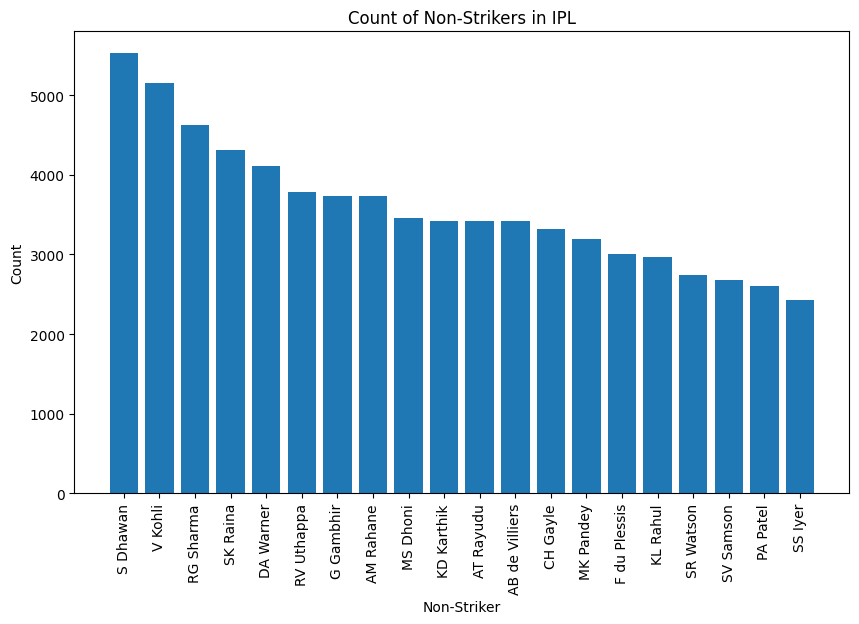

In [ ]:


# Calculate the count of non-strikers and convert it to a DataFrame
non_striker_counts = ipl['non_striker'].value_counts().to_frame().reset_index().head(20)
non_striker_counts.columns = ['non_striker', 'count']

# Sort the DataFrame by count in descending order
non_striker_counts = non_striker_counts.sort_values('count', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(non_striker_counts['non_striker'], non_striker_counts['count'])

# Set labels and title
plt.xlabel('Non-Striker')
plt.ylabel('Count')
plt.title('Count of Non-Strikers in IPL')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


#Shikhar Dhawan, the Indian cricketer, has made a significant impact as a non-striker in the Indian Premier League (IPL). Here's an explanation of his contributions:

*Supportive Role: As a non-striker, Shikhar Dhawan plays a crucial role in providing support and assistance to the striker. He ensures smooth communication, coordination, and quick decision-making with the striker, facilitating quick singles, and converting them into doubles whenever possible.

* Running Between the Wickets: Dhawan's agility and awareness while running between the wickets have been noteworthy. He is quick to respond to the striker's call and is often seen accelerating to complete runs, putting pressure on the fielding side.

* Match Awareness: Dhawan's experience and match awareness make him a valuable asset as a non-striker. He understands the game situation, the required run-rate, and the importance of building partnerships. He adjusts his positioning and running style accordingly, complementing the striker's batting approach.

* Scoring Opportunities: Dhawan capitalizes on scoring opportunities when the ball is hit into the gaps or towards the boundary. He swiftly judges the fielders' positions and the ball's trajectory, maximizing the team's run-scoring potential.

* Mentoring Young Batsmen: Dhawan's role as a senior player extends beyond his performance as a non-striker. He offers guidance and mentoring to young batsmen, helping them improve their running between the wickets and overall cricketing skills.

* Positive Team Environment: Dhawan's energetic and positive presence on the field uplifts team spirit and morale. His enthusiasm and encouragement create a supportive environment, benefiting both the striker and the team as a whole.

* Shikhar Dhawan's contributions as a non-striker go beyond mere numbers. His awareness, running ability, match understanding, and mentoring skills have made him a valuable asset in the IPL. His partnership-building efforts and positive team dynamics have played a part in his team's success and his personal growth as a cricketer.







In [ ]:
ipl['bowler'].value_counts()[:10]

R Ashwin           4024
SP Narine          3516
Harbhajan Singh    3496
B Kumar            3384
A Mishra           3317
PP Chawla          3309
DJ Bravo           3296
RA Jadeja          3262
SL Malinga         2974
UT Yadav           2945
Name: bowler, dtype: int64

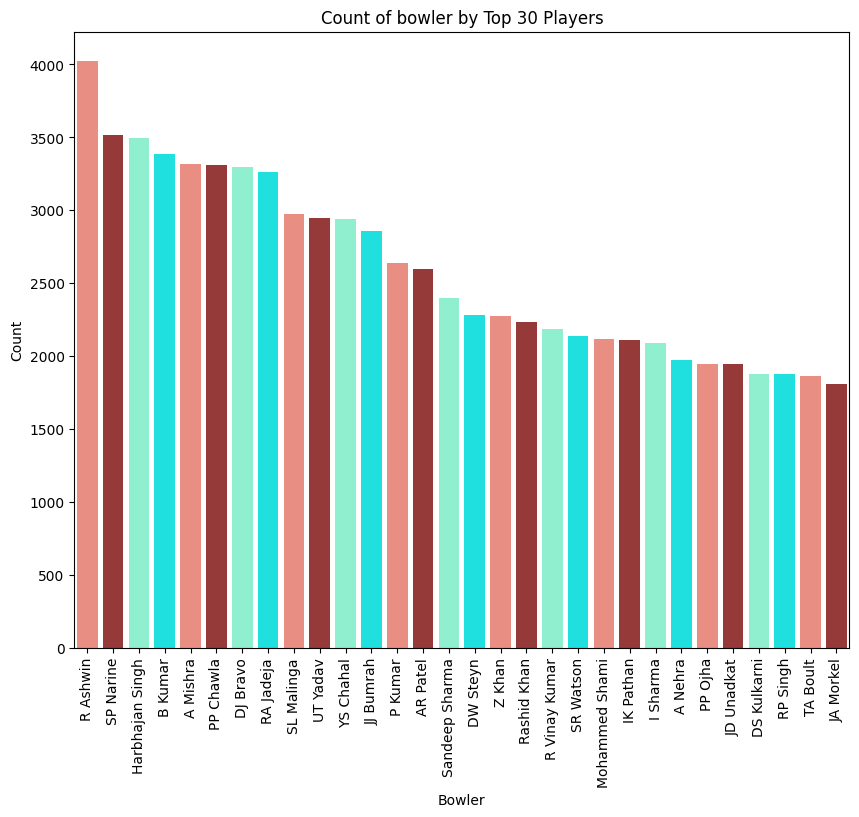

In [ ]:
# Calculate the frequency of each striker
bowler_counts = ipl['bowler'].value_counts()[:30]

# Set up the plot
plt.figure(figsize=(10, 8))

# Specify the color palette
color_palette = ['#FA8072', '#A52A2A', '#7FFFD4', '#00FFFF']

# Plotting the count plot for top 20 strikers with a custom color palette
sns.countplot(data=ipl, x='bowler', order=bowler_counts.index, palette=color_palette)
plt.title('Count of bowler by Top 30 Players')
plt.xlabel('Bowler')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


#Ravi Chandran Ashwin, the Indian cricketer, is known for his exceptional bowling skills and has bowled a significant number of balls in the Indian Premier League (IPL). Here's an explanation of his contribution:

*Strategic Spinner: Ashwin is a strategic spinner who utilizes his experience and cricketing intelligence to outsmart the batsmen. He has a wide array of variations and is known for his ability to control the game's tempo through his bowling.

* Economical Bowler: Ashwin is renowned for his ability to bowl economically, conceding fewer runs per over. This means that he bowls a higher number of dot balls, thereby accumulating more deliveries bowled.

* Wicket-Taking Ability: Ashwin has a knack for taking wickets at crucial moments. His ability to deceive batsmen with his variations often results in dismissals, leading to an increased number of balls bowled in his spells.

* Bowling Accuracy: Ashwin's accuracy in hitting the right areas consistently allows him to create pressure on the batsmen and restrict their scoring opportunities. This precision leads to a higher number of balls bowled as batsmen struggle to score freely against him.

* Strategic Time of Bowling: Ashwin often bowls in the powerplay overs or during the middle overs when the batsmen are looking to score quickly. By bowling during these critical phases of the game, he gets more opportunities to bowl a significant number of balls.

* Multiple Seasons: Ashwin has been a part of the IPL for several seasons, representing different teams such as Chennai Super Kings, Rising Pune Supergiant, and Delhi Capitals. His consistent participation in the tournament has contributed to the number of balls he has bowled over the years.

* Ravi Chandran Ashwin's bowling contributions have made him one of the leading spinners in the IPL. His ability to control the game, take wickets, and bowl economically has resulted in him bowling a significant number of balls in the tournament. His presence on the field adds depth and strategic value to any team he represents.








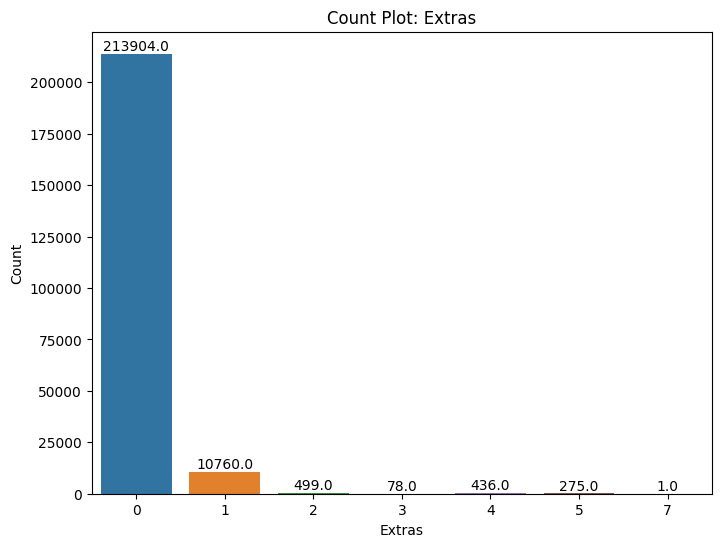

In [ ]:
# Calculate the count of each category in 'extras' column
extras_counts = ipl['extras'].value_counts()

# Create a count plot for 'extras' with count values displayed on top
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=ipl, x='extras')
plt.title('Count Plot: Extras')
plt.xlabel('Extras')
plt.ylabel('Count')

# Display count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

# In the Indian Premier League (IPL), the category of "extras" refers to runs scored by the batting team that are not attributed to the batsman's individual score. Extras include wides, no balls, byes, and leg byes.

While the number of extras can vary from match to match and season to season, here are some observations regarding the occurrence of extras in the IPL:

* Wides: Wides occur when the bowler bowls a delivery that is too wide for the batsman to play a legitimate shot. Wides are the most common form of extras in the IPL. Bowlers sometimes attempt to bowl wide deliveries to restrict the batsmen's scoring opportunities.

* No Balls: No balls occur when the bowler oversteps the front crease while delivering the ball or when the ball bounces more than once before reaching the batsman. No balls result in the batting team being awarded an extra run and a free hit, where the batsman cannot be dismissed except by a run-out.

* Byes and Leg Byes: Byes occur when the ball goes past the batsman without making contact with the bat or the batsman attempting a shot. Leg byes occur when the ball hits the batsman's body or any part other than the bat and runs are taken. Byes and leg byes are additional runs awarded to the batting team.

* Variation by Match Conditions: The number of extras can be influenced by various factors such as pitch conditions, weather conditions, bowler accuracy, and the level of pressure on the bowlers. In matches where bowlers struggle with their line and length or the pitch has uneven bounce, the number of extras may be higher.

* It's important to note that the number of extras in the IPL can vary significantly from match to match and team to team. The occurrence of extras is a part of the game and teams strive to minimize the number of extras conceded while maximizing their own extras through strategic batting and pressure on the bowlers.








**


1.  10760 is wides
2.   499  is
*   78.0
*   436
*   275
*   1.0




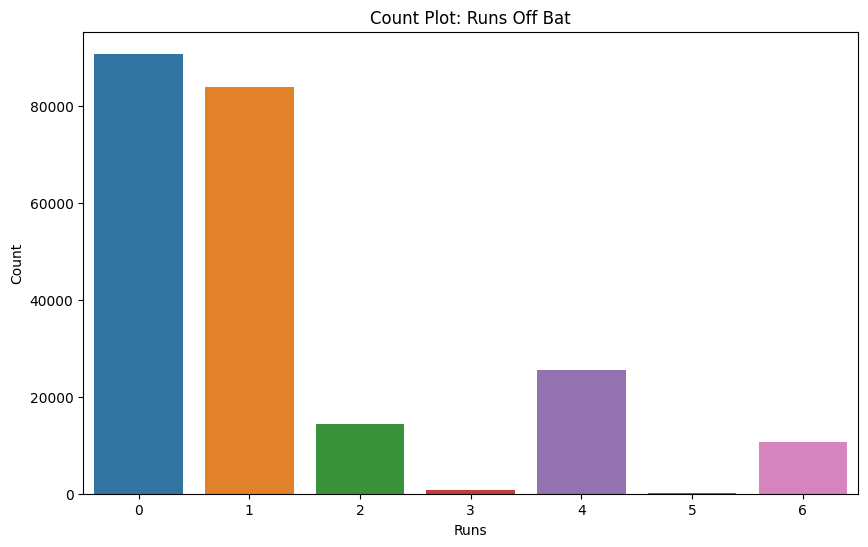

In [ ]:
# Create the count plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(data=ipl, x='runs_off_bat')

# Set labels and title
plt.title('Count Plot: Runs Off Bat')
plt.xlabel('Runs')
plt.ylabel('Count')

# Show the plot
plt.show()

# The category "Runs Off Bat" in the Indian Premier League (IPL) refers to the runs scored by the batsmen through their shots and strokes, excluding any runs scored through extras like wides, no balls, byes, or leg byes.

* he total runs off bat in the IPL from 2008 to 2022 can vary based on individual player performances, match conditions, and team strategies. However, several batsmen have consistently contributed significant runs off the bat throughout the tournament's history.

# Here are some notable observations about the runs off bat in the IPL:

* Prolific Run-Scorers: Several batsmen have consistently accumulated a large number of runs off the bat in the IPL. Players like Virat Kohli, Suresh Raina, Rohit Sharma, David Warner, and AB de Villiers have been among the leading run-scorers in the tournament.

 *Centuries and Big Scores: Batsmen have notched up multiple centuries and big scores, contributing significantly to the runs off the bat. Players like Chris Gayle, Virat Kohli, and AB de Villiers have recorded multiple centuries and have played memorable innings in the IPL.

* High Strike Rates: Along with accumulating runs, many batsmen have maintained a high strike rate, which indicates their ability to score runs quickly. Batsmen with a high strike rate contribute to a significant number of runs off the bat in a limited number of deliveries.

* Impactful Opening Batsmen: Opening batsmen play a crucial role in setting the tone for the innings and contributing to the runs off the bat. Players like David Warner, Chris Gayle, and Shikhar Dhawan have been highly influential in accumulating runs as openers.

* Consistency across Seasons: Some batsmen have maintained their scoring prowess across multiple IPL seasons, consistently contributing a large number of runs off the bat. Their performances have played a significant role in their respective teams' success.

* Batting Records: Several records have been set for the most runs off the bat in a single IPL season and across multiple seasons. These records highlight the exceptional batting performances and the significant contribution of runs off the bat.

* It's important to note that the runs off the bat can vary from season to season and across teams based on various factors such as pitch conditions, team strategies, and individual player form.







# ***Bivariate Analysis***

In [ ]:
# # Convert the "season" column to string type
# ipl['season'] = ipl['season'].astype(str)

# # Set up the plot
# plt.figure(figsize=(10, 8))

# # Plotting the scatter plot for match_id and season
# plt.scatter(ipl['match_id'], ipl['season'])

# plt.title('Scatter Plot: Match ID vs. Season')
# plt.xlabel('Match ID')
# plt.ylabel('Season')

# plt.show()








In [ ]:
# # Set up the plot
# plt.figure(figsize=(10, 8))

# # Extracting the required columns
# super_over = ipl['super_over']
# season = ipl['season']
# # Plotting the line plot
# plt.plot(super_over, season)

# plt.title('Bivariate Line Plot: match_id vs. season')
# plt.xlabel('super_over')
# plt.ylabel('Season')


In [ ]:
ipl['striker'].value_counts()[:10]

V Kohli           5266
S Dhawan          5083
RG Sharma         4632
DA Warner         4313
SK Raina          4177
RV Uthappa        3927
MS Dhoni          3802
G Gambhir         3524
CH Gayle          3516
AB de Villiers    3487
Name: striker, dtype: int64

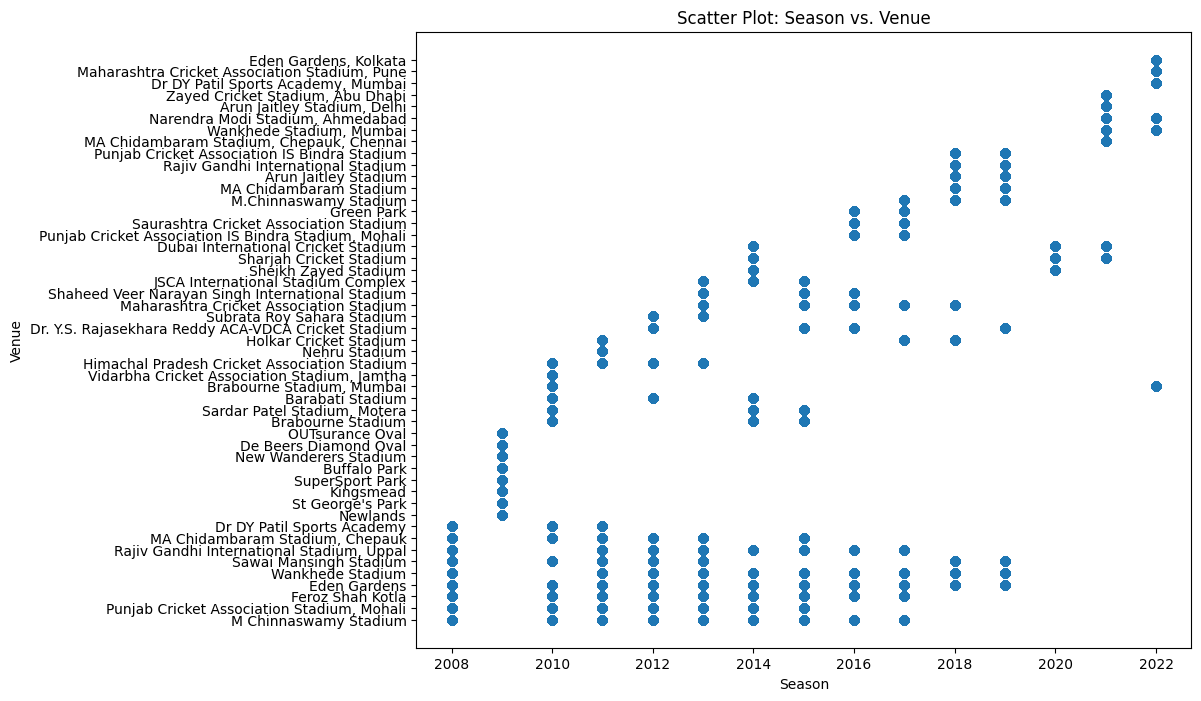

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 8))
# Extract the required columns
season = ipl['season']
venue = ipl['venue']

# Create the scatter plot
plt.scatter(season, venue)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Venue')
plt.title('Scatter Plot: Season vs. Venue')

# Show the plot
plt.show()

In [ ]:
# # Set up the plot
# plt.figure(figsize=(8, 6))

# # Create the strip plot
# sns.stripplot(data=ipl, x='innings', y='ball')

# # Set labels and title
# plt.xlabel('Innings')
# plt.ylabel('Ball')
# plt.title('Strip Plot: Innings vs. Ball')

# # Show the plot
# plt.show()

#### TWO INNINGS

<ipython-input-82-cc36543b6603>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl['season'] = ipl['season'].astype(int)
<ipython-input-82-cc36543b6603>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl['start_date'] = pd.to_datetime(ipl['start_date'])


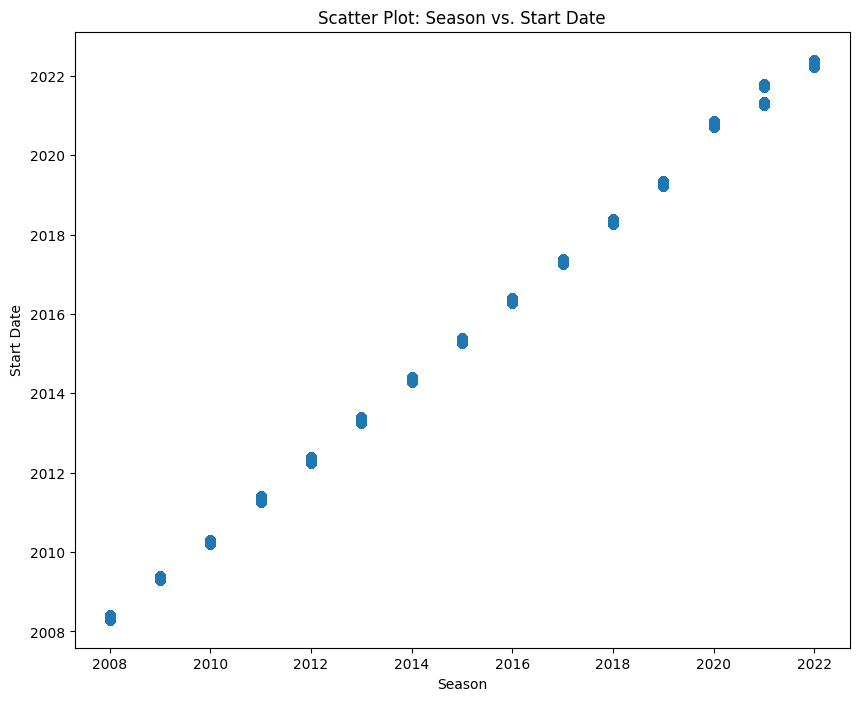

In [ ]:
# Convert 'season' column to string data type
ipl['season'] = ipl['season'].astype(int)

# Convert 'start_date' column to datetime data type
ipl['start_date'] = pd.to_datetime(ipl['start_date'])

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(ipl['season'], ipl['start_date'])

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Start Date')
plt.title('Scatter Plot: Season vs. Start Date')

# Show the plot
plt.show()

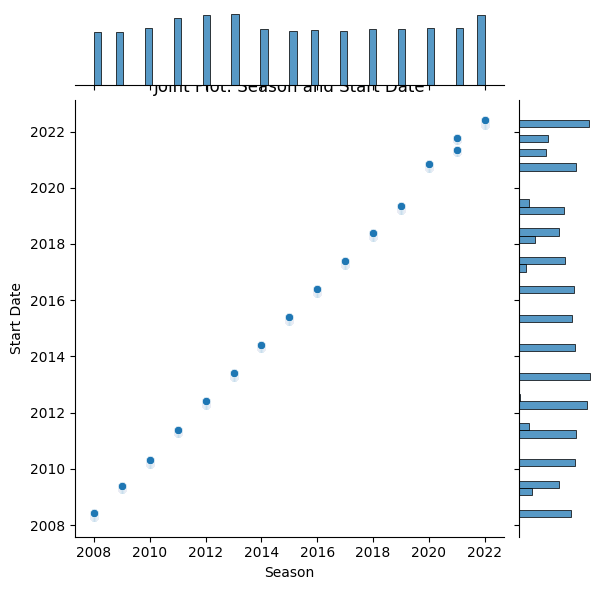

In [ ]:
# Create the joint plot
sns.jointplot(data=ipl, x='season', y='start_date')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Start Date')
plt.title('Joint Plot: Season and Start Date')

# Show the plot
plt.show()

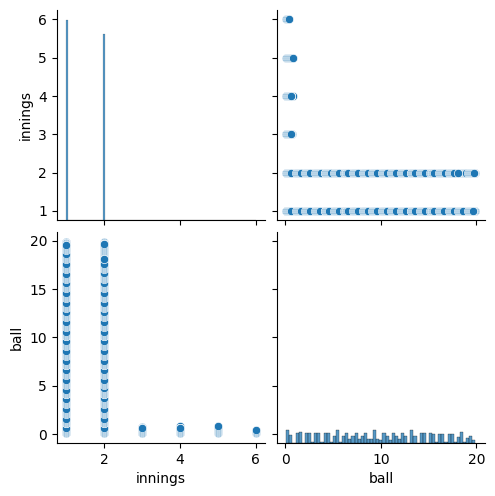

In [ ]:
# Extract the required columns
data = ipl[['innings', 'ball']]

# Create the pair plot
sns.pairplot(data)

# Show the plot
plt.show()

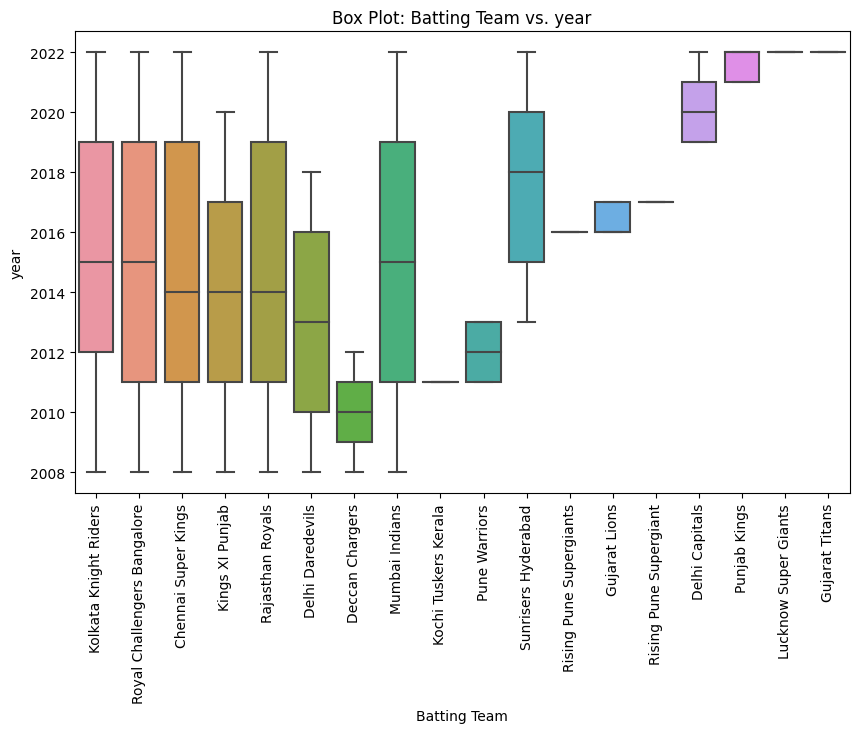

In [ ]:
# Create the box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=ipl, x='batting_team', y='year')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Batting Team')
plt.ylabel('year')
plt.title('Box Plot: Batting Team vs. year')

# Show the plot
plt.show()

***

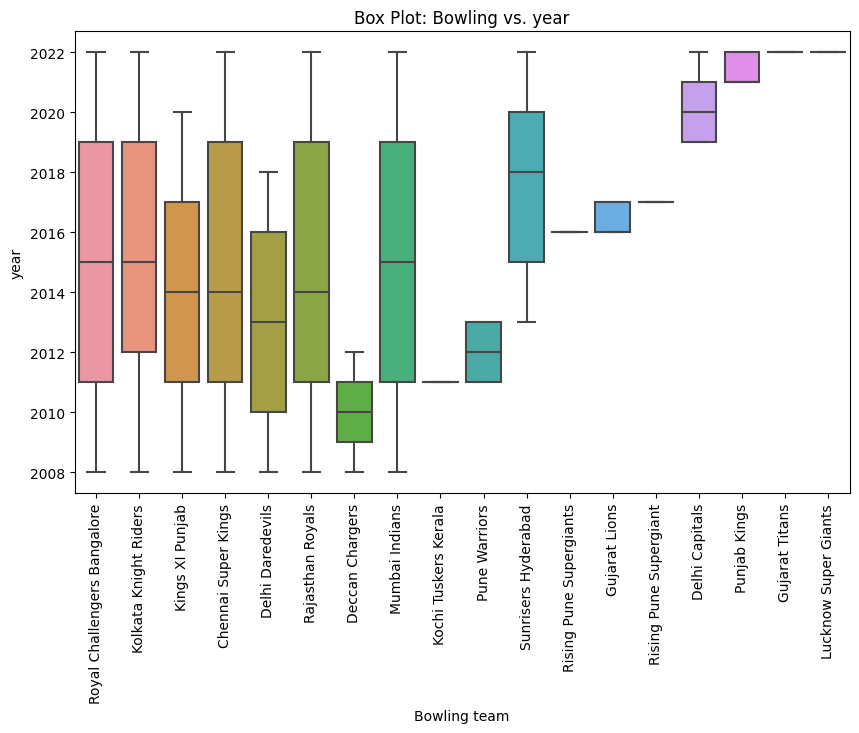

In [ ]:
# Create the box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=ipl, x='bowling_team', y='year')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Bowling team')
plt.ylabel('year')
plt.title('Box Plot: Bowling vs. year')

# Show the plot
plt.show()

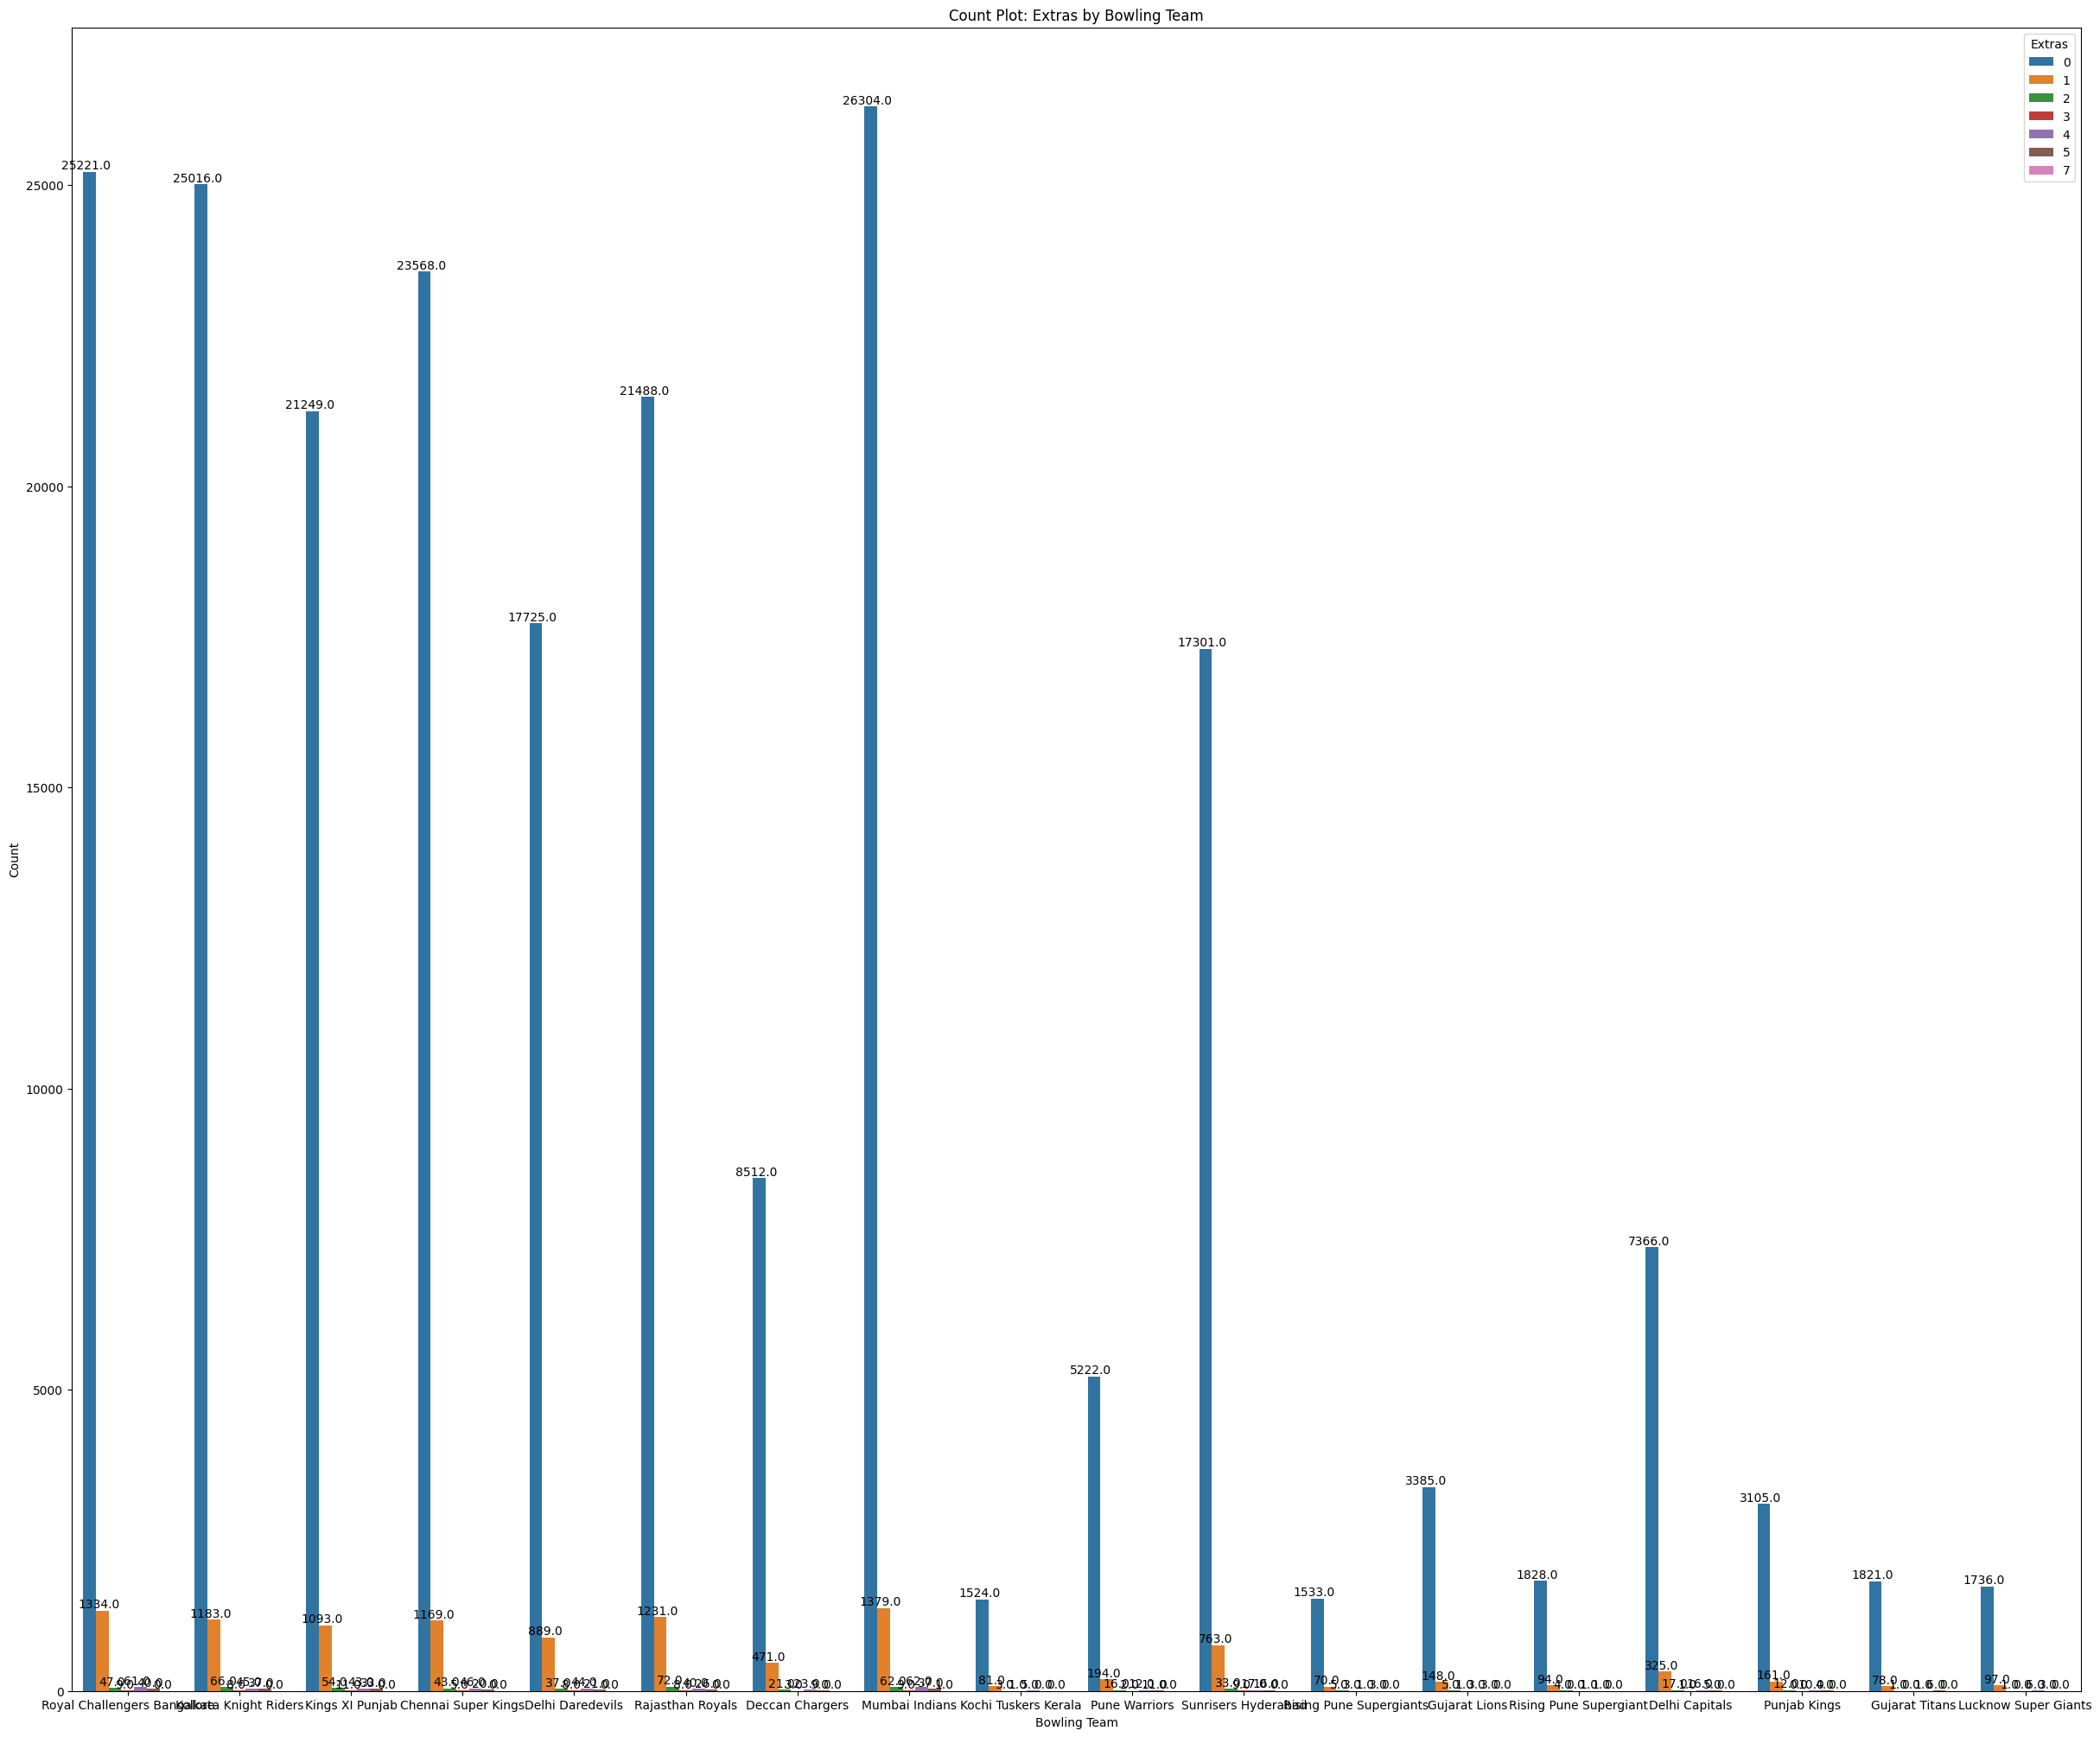

In [ ]:
# Create the count plot
plt.figure(figsize=(30, 25))  # Set the figure size
ax = sns.countplot(data=ipl, x='bowling_team', hue='extras')

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height), (p.get_x() + p.get_width() / 4, height), ha='center', va='bottom')

# Set labels and title
plt.title('Count Plot: Extras by Bowling Team')
plt.xlabel('Bowling Team')
plt.ylabel('Count')
plt.legend(title='Extras')

# Show the plot
plt.show()

<Figure size 2000x1500 with 0 Axes>

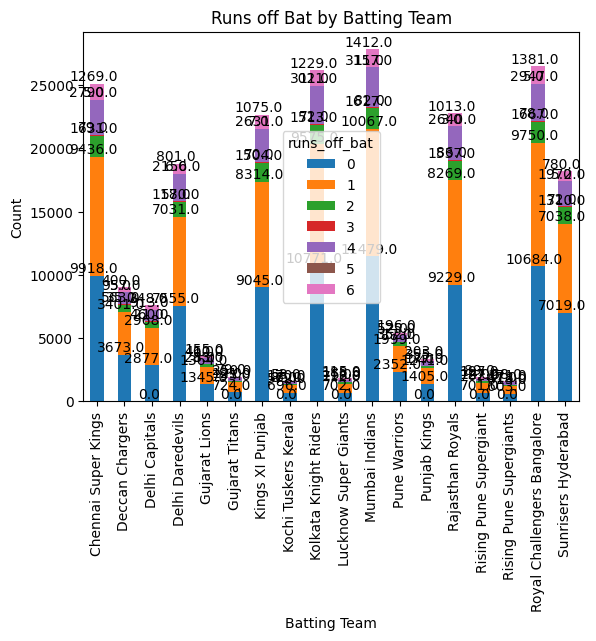

In [ ]:
# Group the data by 'batting_team' and 'runs_off_bat' and calculate the count
runs_counts = ipl.groupby(['batting_team', 'runs_off_bat']).size().unstack().fillna(0)

# Create the bar plot
plt.figure(figsize=(20, 15))
ax = runs_counts.plot(kind='bar', stacked=True)

# Add the count values on top of each bar
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 4
    y = p.get_y() + count
    ax.annotate(count, (x, y), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Batting Team')
plt.ylabel('Count')
plt.title('Runs off Bat by Batting Team')

# Show the plot
plt.show()








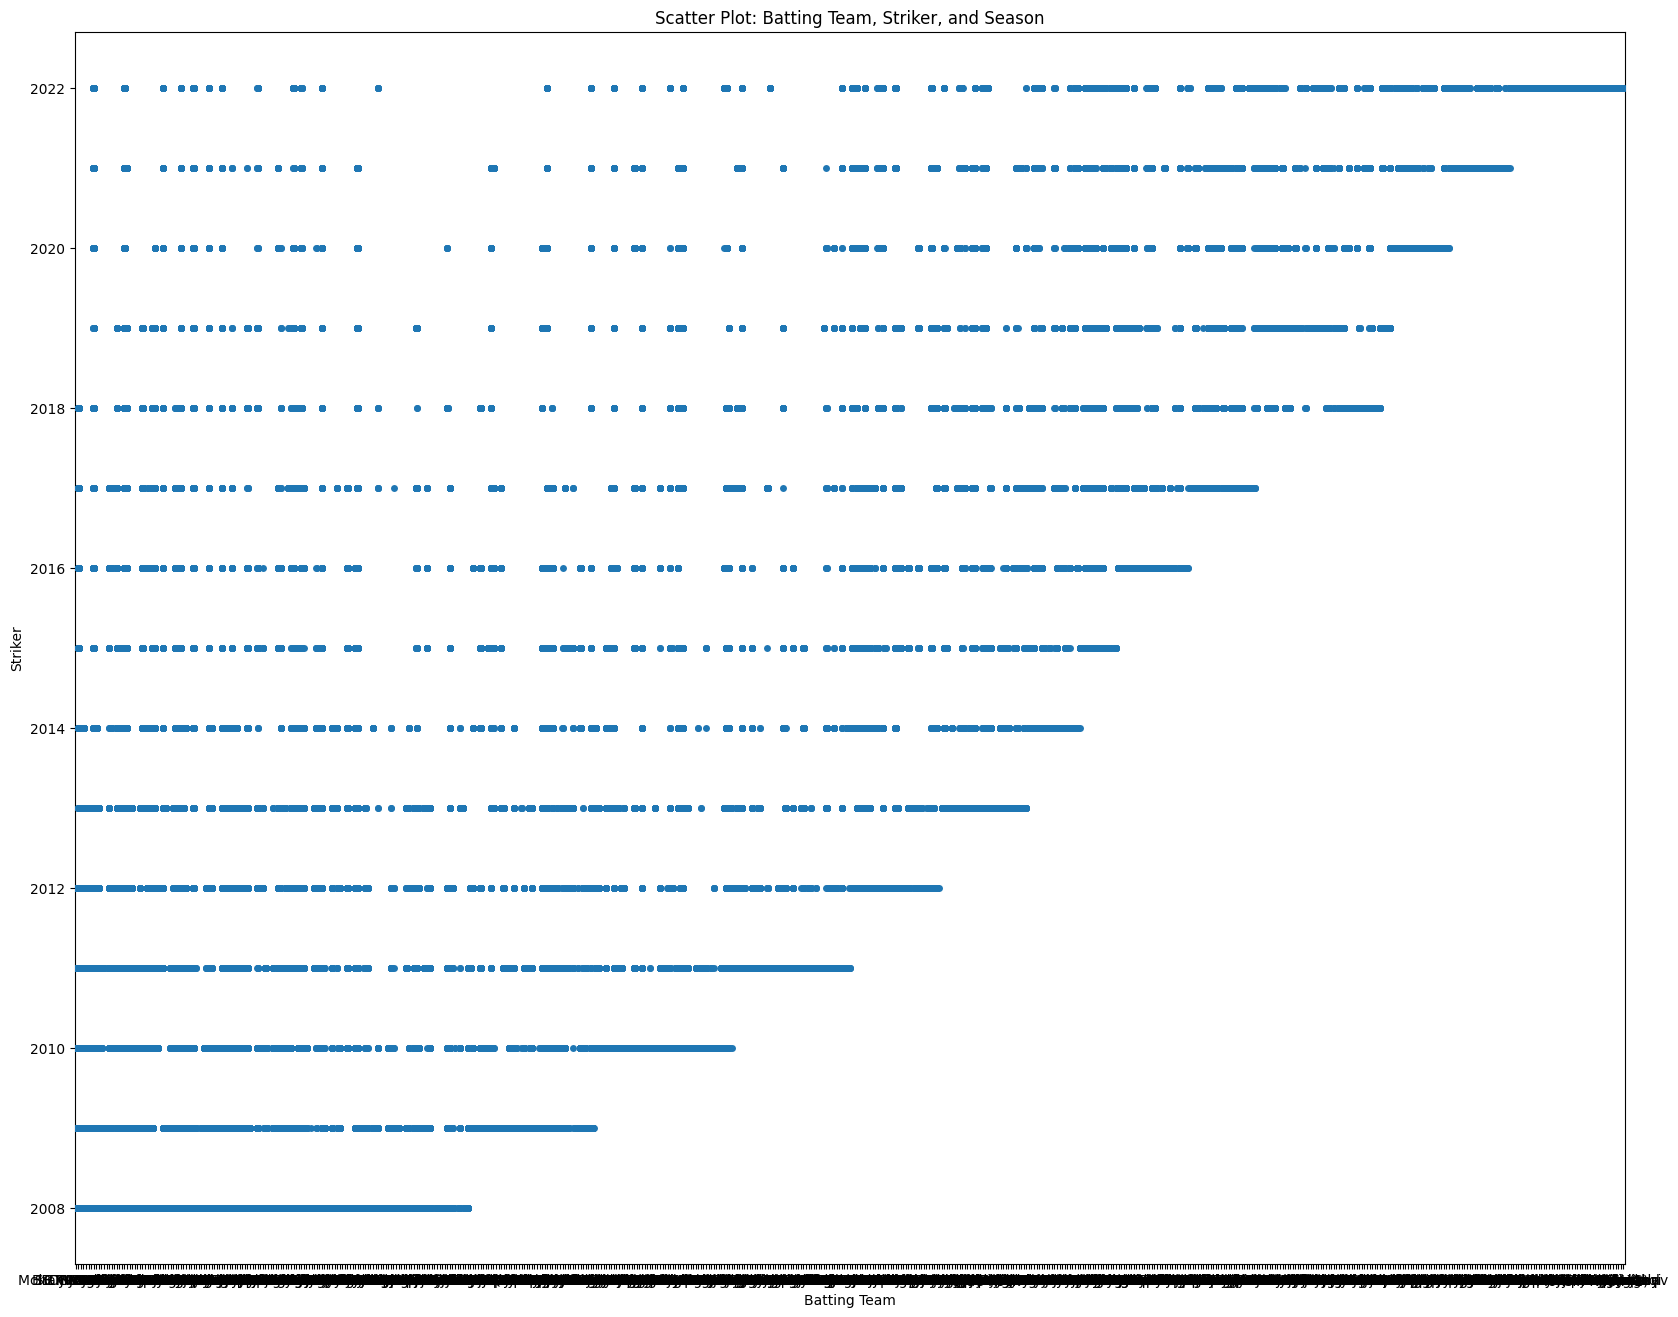

In [ ]:
# Create a scatter plot
ipl2 = ipl
plt.figure(figsize=(20, 16))
sns.stripplot(data=ipl2, x=ipl['striker'], y='year')

# Set labels and title
plt.xlabel('Batting Team')
plt.ylabel('Striker')
plt.title('Scatter Plot: Batting Team, Striker, and Season')

# Show the plot
plt.show()

# ***Multivariate Analysis***

In [ ]:
ipl.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
ipl.isnull().sum()

match_id        0
season          0
start_date      0
venue           0
innings         0
ball            0
batting_team    0
bowling_team    0
striker         0
non_striker     0
bowler          0
runs_off_bat    0
extras          0
day             0
month           0
year            0
dtype: int64

<ipython-input-92-d60da63dc344>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=ipl.corr(), annot=True, cmap='coolwarm')


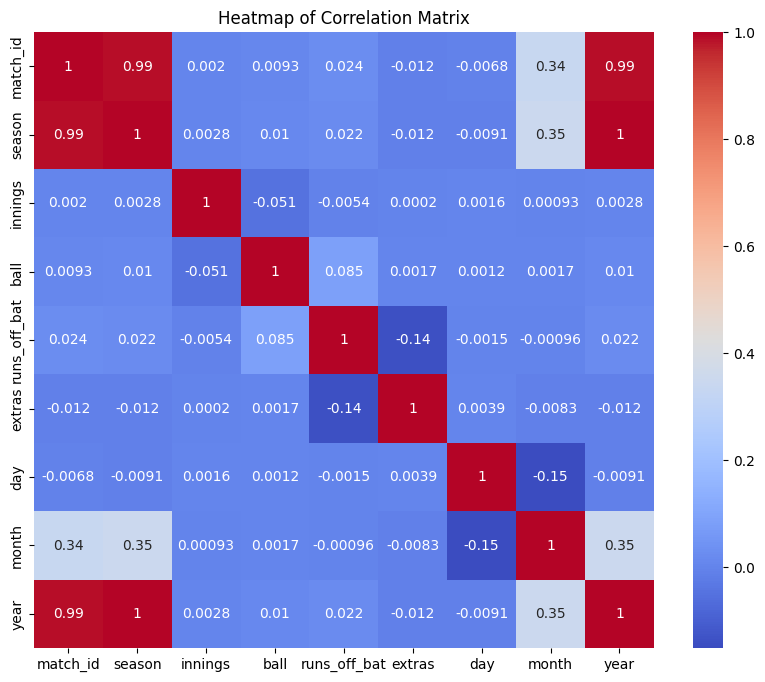

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=ipl.corr(), annot=True, cmap='coolwarm')

# Set title
plt.title('Heatmap of Correlation Matrix')

# Show the plot
plt.show()

ONLY numercial data

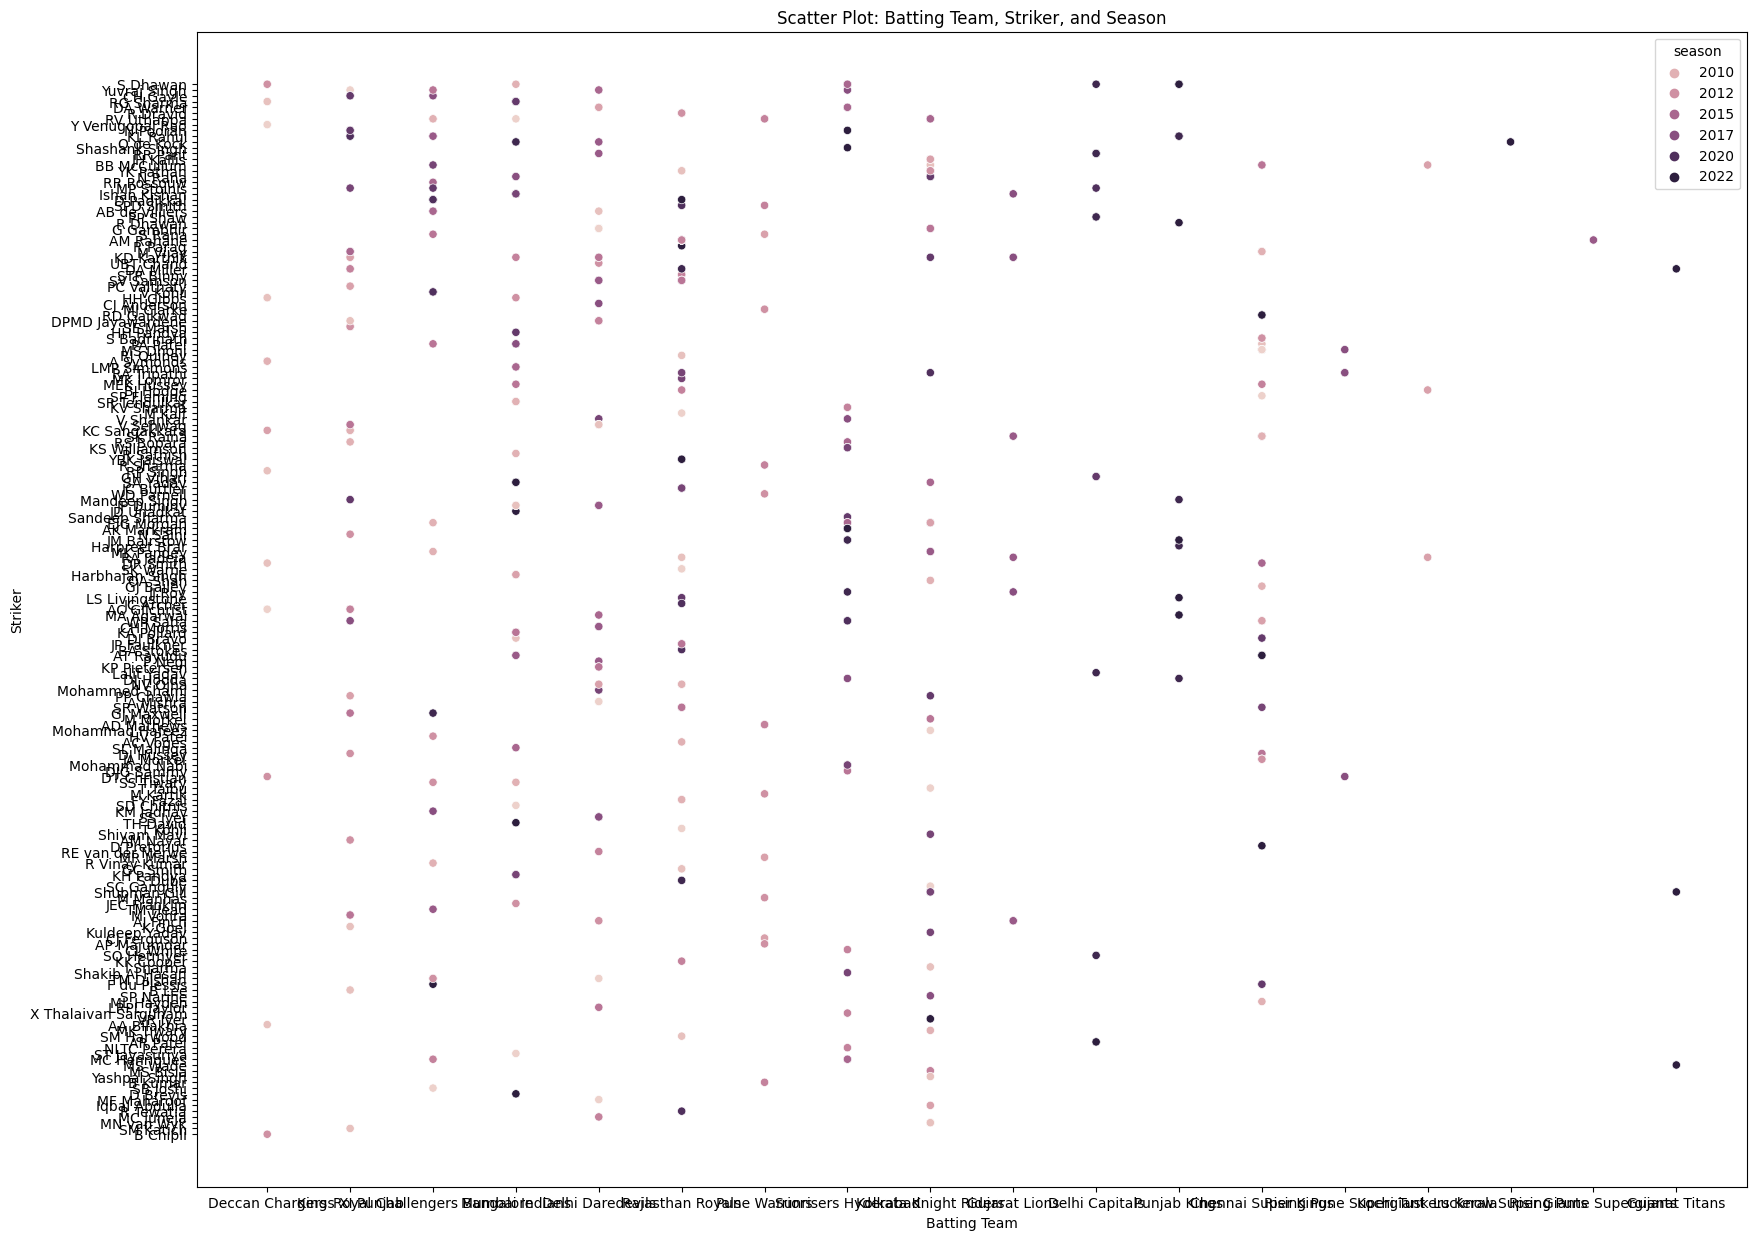

In [ ]:
# Randomly sample 10,000 rows from the dataset
sampled_data = ipl.sample(n=500, random_state=42)

# Create a scatter plot
plt.figure(figsize=(20,15))
sns.scatterplot(data=sampled_data, x='batting_team', y='striker', hue='season')

# Set labels and title
plt.xlabel('Batting Team')
plt.ylabel('Striker')
plt.title('Scatter Plot: Batting Team, Striker, and Season')

# Show the plot
plt.show()

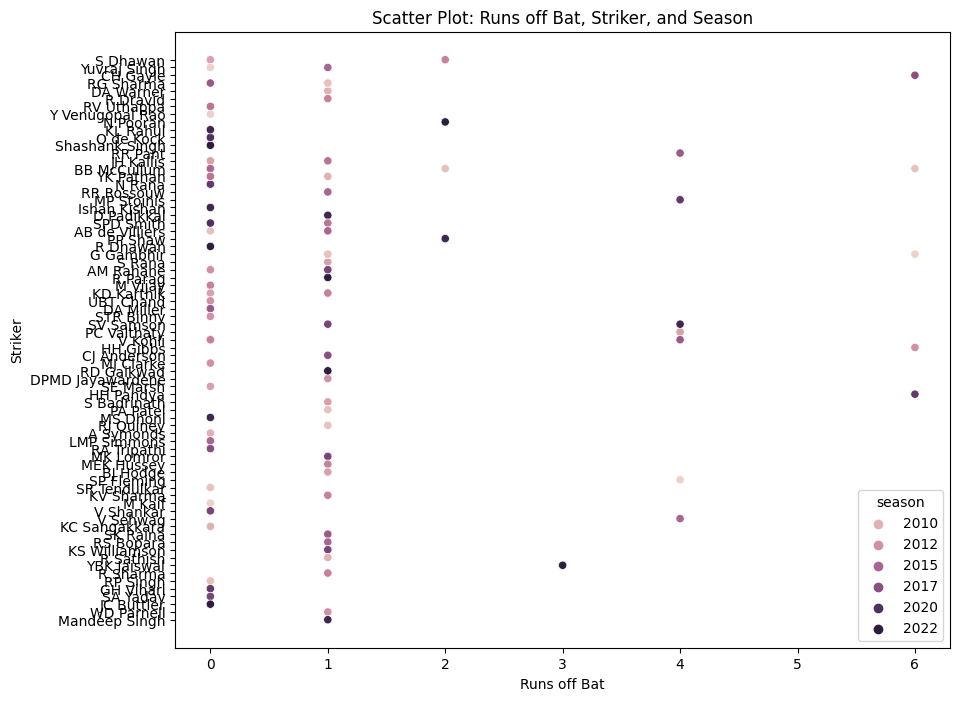

In [ ]:
# Create the scatter plot
sampled_data = ipl.sample(n=100, random_state=42)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sampled_data, x='runs_off_bat', y='striker', hue='season')

# Set labels and title
plt.xlabel('Runs off Bat')
plt.ylabel('Striker')
plt.title('Scatter Plot: Runs off Bat, Striker, and Season')

# Show the plot
plt.show()

In [ ]:
ipl.dtypes

match_id                 int64
season                   int64
start_date      datetime64[ns]
venue                   object
innings                  int64
ball                   float64
batting_team            object
bowling_team            object
striker                 object
non_striker             object
bowler                  object
runs_off_bat             int64
extras                   int64
day                      int64
month                    int64
year                     int64
dtype: object

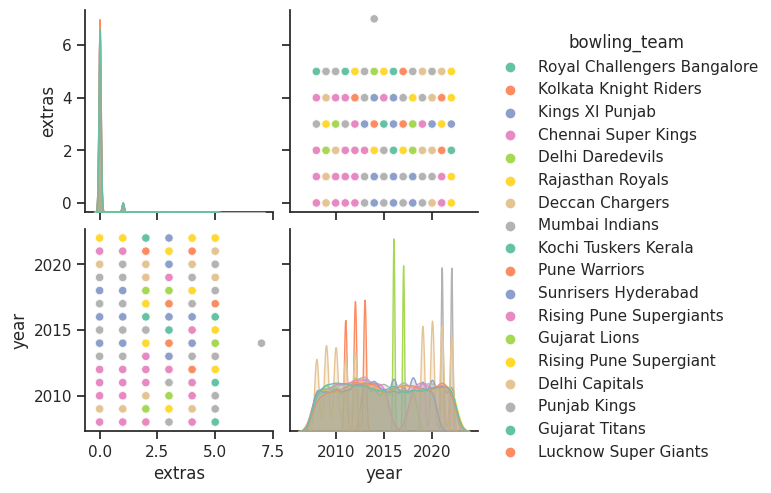

In [ ]:
# Assuming ipl is your DataFrame
sns.set(style="ticks", color_codes=True)
sns.pairplot(ipl[['extras', 'year', 'bowling_team']], hue='bowling_team', palette='Set2')
plt.show()